In [ ]:
# import libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

# import sklearn libararies
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

from google.colab import files
import io

from google.colab import drive
import zipfile
import os
import cv2

# Import Warnings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.utils import shuffle
#from sklearn.cross_validation import train_test_split
# Import tensorflow as the backend for Keras
from sklearn.metrics import classification_report,confusion_matrix
import itertools

import lightgbm as lgb
import pickle

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train.csv


In [ ]:
df

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,0,335.160105,-9999.00000,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,5.32740,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.0,-9999.0000
1,0,335.660105,-9999.00000,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,5.82350,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.0,-9999.0000
2,0,336.160105,-9999.00000,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,6.52280,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.0,-9999.0000
3,0,336.660105,-9999.00000,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,7.22850,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.0,-9999.0000
4,0,337.160105,-9999.00000,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,9.50200,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.0,-9999.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318962,8,12142.500000,64.57612,-9999.0,8.5,8.550179,2.613020,0.026474,32.91600,0.109335,5.20765,4.081079,3.646631,10.43060,0.028313,1.0,0.2736
318963,8,12143.000000,66.20669,-9999.0,8.5,8.520521,2.614332,0.024994,28.76523,0.099368,5.23046,4.120065,3.936356,9.47309,0.027530,1.0,0.2344
318964,8,12143.500000,67.43187,-9999.0,8.5,8.521563,2.620479,0.027400,25.70403,0.097774,5.33586,4.662224,4.245169,8.96010,0.023795,1.0,0.2054
318965,8,12144.000000,66.56465,-9999.0,8.5,8.522397,2.623435,0.027175,22.94222,0.089295,5.34635,4.810604,4.372118,8.80637,0.022048,1.0,0.1793


In [ ]:
df['missing_DTC'] = np.where(df['DTC']== -9999, 1, 0)
df['missing_DTS'] = np.where(df['DTS']== -9999, 1, 0)
df['missing_BS'] = np.where(df['BS']== -9999, 1, 0)
df['missing_DEN'] = np.where(df['DEN']== -9999, 1, 0)
df['missing_DENC'] = np.where(df['DENC']== -9999, 1, 0)
df['missing_GR'] = np.where(df['GR']== -9999, 1, 0)
df['missing_NEU'] = np.where(df['NEU']== -9999, 1, 0)
df['missing_PEF'] = np.where(df['PEF']== -9999, 1, 0)
df['missing_RDEP'] = np.where(df['RDEP']== -9999, 1, 0)
df['missing_RMED'] = np.where(df['RMED']== -9999, 1, 0)
df['missing_CALI'] = np.where(df['CALI']== -9999, 1, 0)

df = df[ df['GR'] != -9999 ]

In [ ]:
df_vsh = df[(df['VSH'] != -9999)]
df_phif = df[(df['PHIF'] != -9999)]
df_sw = df[(df['SW'] != -9999)]

In [ ]:
df.replace(['-9999', -9999], 0, inplace=True)
df = df.fillna(0)

df_DTC_group = df.groupby('WELLNUM').agg({'DTC': ['mean', 'min', 'max','std','median']})
df_DTC_group.columns = df_DTC_group.columns.map('_'.join)
df_DTC_group = df_DTC_group.reset_index()

df_DTS_group = df.groupby('WELLNUM').agg({'DTS': ['mean', 'min', 'max','std','median']})
df_DTS_group.columns = df_DTS_group.columns.map('_'.join)
df_DTS_group = df_DTS_group.reset_index()

df_BS_group = df.groupby('WELLNUM').agg({'BS': ['mean', 'min', 'max','std','median']})
df_BS_group.columns = df_BS_group.columns.map('_'.join)
df_BS_group = df_BS_group.reset_index()

df_CALI_group = df.groupby('WELLNUM').agg({'CALI': ['mean', 'min', 'max','std','median']})
df_CALI_group.columns = df_CALI_group.columns.map('_'.join)
df_CALI_group = df_CALI_group.reset_index()

df_DEN_group = df.groupby('WELLNUM').agg({'DEN': ['mean', 'min', 'max','std','median']})
df_DEN_group.columns = df_DEN_group.columns.map('_'.join)
df_DEN_group = df_DEN_group.reset_index()

df_DENC_group = df.groupby('WELLNUM').agg({'DENC': ['mean', 'min', 'max','std','median']})
df_DENC_group.columns = df_DENC_group.columns.map('_'.join)
df_DENC_group = df_DENC_group.reset_index()

df_GR_group = df.groupby('WELLNUM').agg({'GR': ['mean', 'min', 'max','std','median']})
df_GR_group.columns = df_GR_group.columns.map('_'.join)
df_GR_group = df_GR_group.reset_index()

df_NEU_group = df.groupby('WELLNUM').agg({'NEU': ['mean', 'min', 'max','std','median']})
df_NEU_group.columns = df_NEU_group.columns.map('_'.join)
df_NEU_group = df_NEU_group.reset_index()

df_PEF_group = df.groupby('WELLNUM').agg({'PEF': ['mean', 'min', 'max','std','median']})
df_PEF_group.columns = df_PEF_group.columns.map('_'.join)
df_PEF_group = df_PEF_group.reset_index()

df_RDEP_group = df.groupby('WELLNUM').agg({'RDEP': ['mean', 'min', 'max','std','median']})
df_RDEP_group.columns = df_RDEP_group.columns.map('_'.join)
df_RDEP_group = df_RDEP_group.reset_index()

df_RMED_group = df.groupby('WELLNUM').agg({'RMED': ['mean', 'min', 'max','std','median']})
df_RMED_group.columns = df_RMED_group.columns.map('_'.join)
df_RMED_group = df_RMED_group.reset_index()

df_ROP_group = df.groupby('WELLNUM').agg({'ROP': ['mean', 'min', 'max','std','median']})
df_ROP_group.columns = df_ROP_group.columns.map('_'.join)
df_ROP_group = df_ROP_group.reset_index()

### VSH training

In [ ]:
####feature eng ratio, log, and outlier flag
df_vsh.replace(['-9999', -9999], 0, inplace=True)

In [ ]:
### max min avg std of feature by well
df_vsh.replace(['-9999', -9999], 0, inplace=True)


df_vsh = df_vsh.merge(df_DTC_group, on='WELLNUM', how='left')
df_vsh = df_vsh.merge(df_DTS_group, on='WELLNUM', how='left')
df_vsh = df_vsh.merge(df_BS_group, on='WELLNUM', how='left')
df_vsh = df_vsh.merge(df_CALI_group, on='WELLNUM', how='left')
df_vsh = df_vsh.merge(df_DEN_group, on='WELLNUM', how='left')
df_vsh = df_vsh.merge(df_DENC_group, on='WELLNUM', how='left')
df_vsh = df_vsh.merge(df_GR_group, on='WELLNUM', how='left')
df_vsh = df_vsh.merge(df_NEU_group, on='WELLNUM', how='left')
df_vsh = df_vsh.merge(df_PEF_group, on='WELLNUM', how='left')
df_vsh = df_vsh.merge(df_RDEP_group, on='WELLNUM', how='left')
df_vsh = df_vsh.merge(df_RMED_group, on='WELLNUM', how='left')
df_vsh = df_vsh.merge(df_ROP_group, on='WELLNUM', how='left')


In [ ]:
core_feat = ['DTC', 'DTS', 'BS', 'CALI', 'DEN', 'DENC','GR','NEU', 'PEF', 'RDEP', 'RMED', 'ROP'] 
null_feat = ['missing_DTC','missing_DTS', 'missing_BS', 'missing_DEN', 'missing_DENC','missing_GR','missing_NEU', 'missing_PEF', 'missing_RDEP','missing_RMED','missing_CALI']

df_vsh['DTC_to_DTS'] = df_vsh['DTC']/df_vsh['DTS']
df_vsh['DTS_to_BS'] = df_vsh['DTS']/df_vsh['BS']
df_vsh['BS_to_CALI'] = df_vsh['BS']/df_vsh['CALI']
df_vsh['CALI_to_DEN'] = df_vsh['CALI']/df_vsh['DEN']
df_vsh['DEN_to_DENC'] = df_vsh['DEN']/df_vsh['DENC']
df_vsh['DENC_to_GR'] = df_vsh['DENC']/df_vsh['GR']
df_vsh['GR_to_NEU'] = df_vsh['GR']/df_vsh['NEU']
df_vsh['NEU_to_PEF'] = df_vsh['NEU']/df_vsh['PEF']
df_vsh['PEF_to_RDEP'] = df_vsh['PEF']/df_vsh['RDEP']
df_vsh['RDEP_to_RMED'] = df_vsh['RDEP']/df_vsh['RMED']
df_vsh['RMED_to_ROP'] = df_vsh['RMED']/df_vsh['ROP']
df_vsh['ROP_to_DTC'] = df_vsh['ROP']/df_vsh['DTC']
df_vsh['DTC_to_BS'] = df_vsh['DTC']/df_vsh['BS']
df_vsh['DTS_to_CALI'] = df_vsh['DTS']/df_vsh['CALI']
df_vsh['BS_to_DEN'] = df_vsh['BS']/df_vsh['DEN']
df_vsh['CALI_to_DENC'] = df_vsh['CALI']/df_vsh['DENC']
df_vsh['DEN_to_GR'] = df_vsh['DEN']/df_vsh['GR']
df_vsh['DENC_to_NEU'] = df_vsh['DENC']/df_vsh['NEU']

###log
for i in core_feat:
  feat = 'ln_'+i
  df_vsh[feat] = np.log(df_vsh[i])

###outlier
df_vsh['is_outlier_DTC'] = np.where( df_vsh['DTC'] > 95 , 1, 0 )
df_vsh['is_outlier_DTS'] = np.where( df_vsh['DTS'] > 152 , 1, 0 )
df_vsh['is_outlier_BS'] = np.where( df_vsh['BS'] > 8.6 , 1, 0 )
df_vsh['is_outlier_CALI'] = np.where( df_vsh['CALI'] > 8.8 , 1, 0 )
df_vsh['is_outlier_DEN'] = np.where( df_vsh['DEN'] > 2.7 , 1, 0 )
df_vsh['is_outlier_DENC'] = np.where( df_vsh['DENC'] > 0.09 , 1, 0 )
df_vsh['is_outlier_GR'] = np.where( df_vsh['GR'] > 89 , 1, 0 )
df_vsh['is_outlier_GR_2'] = np.where( df_vsh['GR'] > 120 , 1, 0 )
df_vsh['is_outlier_GR_3'] = np.where( df_vsh['GR'] > 200 , 1, 0 )
df_vsh['is_outlier_NEU'] = np.where( df_vsh['NEU'] > 0.32 , 1, 0 )
df_vsh['is_outlier_PEF'] = np.where( df_vsh['PEF'] > 8.5 , 1, 0 )
df_vsh['is_outlier_RDEP'] = np.where( df_vsh['RDEP'] > 30 , 1, 0 )
df_vsh['is_outlier_RDEP'] = np.where( df_vsh['RDEP'] > 120 , 1, 0 )
df_vsh['is_outlier_RMED']= np.where( df_vsh['RMED'] > 530, 1, 0 )
df_vsh['is_outlier_ROP']= np.where( df_vsh['ROP'] > 37 , 1, 0 )

###feature power of 2

df_vsh['pow_DTC'] = np.power(2,(df_vsh['DTC']))
df_vsh['pow_DTS'] = np.power(2,df_vsh['DTS'])
df_vsh['pow_BS'] = np.power(2,3.7*df_vsh['BS'])
df_vsh['pow_CALI'] = np.power(2,3.7*df_vsh['CALI'])
df_vsh['pow_DEN'] = np.power(2,3.7*df_vsh['DEN'])
df_vsh['pow_DENC'] = np.power(2,3.7*df_vsh['DENC'])
df_vsh['pow_GR'] = np.power(2,3.7*df_vsh['GR'])
df_vsh['pow_NEU'] = np.power(2,3.7*df_vsh['NEU'])
df_vsh['pow_PEF'] = np.power(2,3.7*df_vsh['PEF'])
df_vsh['pow_RDEP'] = np.power(2,3.7*df_vsh['RDEP'])
df_vsh['pow_RMED'] = np.power(2,3.7*df_vsh['RMED'])
df_vsh['pow_ROP'] = np.power(2,3.7*df_vsh['ROP'])



In [ ]:
str(-1)

'-1'

In [ ]:
####Shift 1, 2, -1, -2  of null use same_rows
shift_feat = ['WELLNUM'] + core_feat
shift_level = [-5,-4,-3,-2,-1,1,2,3,4,5]
for i in shift_feat:
  for j in shift_level:
    name = 'shift_'+str(j)+'_'+i
    df_vsh[name] = df_vsh[i].shift(j)

In [ ]:
####Shift 1, 2, -1, -2  of null use same_rows

### fixed wrong well shift
for i in core_feat:
  shift_name_1 = 'shift_-3_'+i
  shift_name_2 = 'shift_-2_'+i
  shift_name_3 = 'shift_-1_'+i
  shift_name_4 = 'shift_1_'+i
  shift_name_5 = 'shift_2_'+i
  shift_name_6 = 'shift_3_'+i
  shift_name_7 = 'shift_-4_'+i
  shift_name_8 = 'shift_4_'+i
  shift_name_9 = 'shift_-5_'+i
  shift_name_10 = 'shift_5_'+i


  df_vsh[shift_name_1] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_-3_WELLNUM'],df_vsh[i], df_vsh[shift_name_1])
  df_vsh[shift_name_2] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_-2_WELLNUM'],df_vsh[i], df_vsh[shift_name_2])
  df_vsh[shift_name_3] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_-1_WELLNUM'],df_vsh[i], df_vsh[shift_name_3])
  df_vsh[shift_name_4] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_1_WELLNUM'],df_vsh[i], df_vsh[shift_name_4])
  df_vsh[shift_name_5] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_2_WELLNUM'],df_vsh[i], df_vsh[shift_name_5])
  df_vsh[shift_name_6] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_3_WELLNUM'],df_vsh[i], df_vsh[shift_name_6])

  df_vsh[shift_name_7] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_-4_WELLNUM'],df_vsh[i], df_vsh[shift_name_7])
  df_vsh[shift_name_8] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_4_WELLNUM'],df_vsh[i], df_vsh[shift_name_8])
  df_vsh[shift_name_9] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_-5_WELLNUM'],df_vsh[i], df_vsh[shift_name_9])
  df_vsh[shift_name_10] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_5_WELLNUM'],df_vsh[i], df_vsh[shift_name_10])

In [ ]:
all_feat = core_feat + null_feat
ratio_feat = ['BS_to_CALI', 'CALI_to_DEN', 'DEN_to_DENC', 'DENC_to_GR', 'GR_to_NEU','NEU_to_PEF', 'PEF_to_RDEP', 'RDEP_to_RMED', 'RMED_to_ROP','ROP_to_DTC']
log_feat = ['ln_DTC', 'ln_DTS', 'ln_BS', 'ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU', 'ln_PEF', 'ln_RDEP', 'ln_RMED', 'ln_ROP']
out_lier_feat = ['is_outlier_DTC', 'is_outlier_DTS', 'is_outlier_BS', 'is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU', 'is_outlier_PEF','is_outlier_RDEP', 'is_outlier_RMED', 'is_outlier_ROP']

all_feat = all_feat + ratio_feat + log_feat + out_lier_feat
X = df_vsh[all_feat]

In [ ]:
uploaded = files.upload()
full_line_classifi = lgb.Booster(model_file='full_line_classifi.txt')

Saving full_line_classifi.txt to full_line_classifi.txt


In [ ]:
line_proba = full_line_classifi.predict(X)

In [ ]:
p_l_cols = []
for i in range(1,24):
  name = 'p_l_'+str(i)
  p_l_cols.append(name)

df_line_proba = pd.DataFrame(line_proba, columns =p_l_cols)

In [ ]:
df_vsh = pd.concat([df_vsh.reset_index(), df_line_proba],  axis=1)

In [ ]:
df_vsh['p_l_1']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
45095    0.0
45096    0.0
45097    0.0
45098    0.0
45099    0.0
Name: p_l_1, Length: 45100, dtype: float64

In [ ]:
def group_line(x):
  if x['p_l_1'] >= 0.8 :
    return 1
  elif x['p_l_2']>= 0.8:
    return 2
  elif x['p_l_3'] >= 0.8:
    return 3
  elif x['p_l_4'] >= 0.8:
    return 4
  elif x['p_l_5'] >= 0.8:
    return 5
  elif x['p_l_6'] >= 0.8:
    return 6
  elif x['p_l_7'] >= 0.8:
    return 7
  elif x['p_l_8'] >= 0.8:
    return 8
  elif x['p_l_9'] >= 0.8:
    return 9
  elif x['p_l_10'] >= 0.8:
    return 10
  elif x['p_l_11'] >= 0.8:
    return 11
  elif x['p_l_12'] >= 0.8:
    return 12
  elif x['p_l_13'] >= 0.8:
    return 13
  elif x['p_l_14'] >= 0.8:
    return 14
  elif x['p_l_15']>= 0.8:
    return 15
  elif x['p_l_16'] >= 0.8:
    return 16
  elif x['p_l_17'] >= 0.8:
    return 17
  elif x['p_l_18']>= 0.8:
    return 18
  elif x['p_l_19'] >= 0.8:
    return 19
  elif x['p_l_20'] >= 0.8:
    return 20
  elif x['p_l_21'] >= 0.8:
    return 21
  elif x['p_l_22'] >= 0.8:
    return 22
  elif x['p_l_23'] >= 0.8:
    return 23
  else:
    return 1

df_vsh['line_num'] = df_vsh.apply(group_line,axis =1)

In [ ]:
# Predict line (facies)

# uploaded = files.upload()
# with open('full_line_classifi.pkl', 'rb') as pickle_in_2:
#      full_line_classifi = pickle.load(pickle_in_2)

# line_proba = full_line_classifi.predict_proba(X)

# p_l_cols = []
# for i in range(1,24):
#   name = 'p_l_'+str(i)
#   p_l_cols.append(name)

# df_line_proba = pd.DataFrame(line_proba, columns =p_l_cols)
# df_vsh['line_num'] = full_line_classifi.predict(X)

In [ ]:
# df_vsh = pd.concat([df_vsh.reset_index(), df_line_proba],  axis=1)
df_vsh = df_vsh.drop(columns=['index']) 

In [ ]:
# Predict well
uploaded = files.upload()
with open('full_well_lgbm_classifi.pkl', 'rb') as pickle_in_2:
     full_well_lgbm_classifi = pickle.load(pickle_in_2)

Saving full_well_lgbm_classifi.pkl to full_well_lgbm_classifi.pkl


In [ ]:
well_proba = full_well_lgbm_classifi.predict_proba(X)

p_well_cols = []
for i in range(0,9):
  name = 'prob_well_'+str(i)
  p_well_cols.append(name)

df_well_proba = pd.DataFrame(well_proba, columns =p_well_cols)
df_vsh = pd.concat([df_vsh, df_well_proba],  axis=1)

In [ ]:
###label M & C
####create M & C feat
def group_M(x):
  if x == 1 :
    return 0.01069478
  elif x == 2:
    return 0.00425521
  elif x == 3:
    return 0.00952388
  elif x == 4:
    return 0.00833333
  elif x == 5:
    return 0.0079365
  elif x == 6:
    return 0.00900883
  elif x == 7:
    return 0.01515163
  elif x == 8:
    return 0.00523569
  elif x == 9:
    return 0.00800002
  elif x == 10:
    return 0.00689663
  elif x == 11:
    return 0.00571426
  elif x == 12:
    return 0.00884953
  elif x == 13:
    return 0.00699291
  elif x == 14:
    return 0.0088489
  elif x == 15:
    return 0.01020469
  elif x == 16:
    return 0.00869594
  elif x == 17:
    return 0.00999999
  elif x == 18:
    return 0.0081969
  elif x == 19:
    return 0.00990045
  elif x == 20:
    return 0.00862087
  elif x == 21:
    return 0.00555654
  elif x == 22:
    return 0.00879143
  else:
    return 0.00960141  


####create C feat
def group_C(x):
  if x == 1 :
    return -0.20841058992342948
  elif x == 2:
    return -0.0638053033448649
  elif x == 3:
    return -0.14286035929225355
  elif x == 4:
    return -0.12499931016703292
  elif x == 5:
    return -0.07142815240118844
  elif x == 6:
    return -0.081073316243022
  elif x == 7:
    return -0.13636788085504536
  elif x == 8:
    return -0.04713555384972523
  elif x == 9:
    return -0.040003622815625195
  elif x == 10:
    return -0.034486746954953296
  elif x == 11:
    return -0.02856803002014946
  elif x == 12:
    return -0.06194662661225553
  elif x == 13:
    return -0.04896762702585983
  elif x == 14:
    return -0.061884114281857694
  elif x == 15:
    return -0.07148843606610955
  elif x == 16:
    return -0.04349270787950987
  elif x == 17:
    return -0.050027731047379786
  elif x == 18:
    return -0.040991165727213646
  elif x == 19:
    return -0.03955033495373206
  elif x == 20:
    return -0.03448913427588074
  elif x == 21:
    return -0.02225987530885598
  elif x == 22:
    return -0.018785227994717088
  else:
    return -0.20000099008733666

df_vsh['C'] = df_vsh['line_num'].apply(group_C)    
df_vsh['M'] = df_vsh['line_num'].apply(group_M)

In [ ]:
####Previous best VSH feature
# uploaded = files.upload()
# best_vsh_lgb = lgb.Booster(model_file='reg_vsh_lgbm.txt')

###noob

Saving reg_vsh_lgbm.txt to reg_vsh_lgbm.txt


In [ ]:
# all_feat = core_feat + null_feat
# ratio_feat = ['BS_to_CALI', 'CALI_to_DEN', 'DEN_to_DENC', 'DENC_to_GR', 'GR_to_NEU','NEU_to_PEF', 'PEF_to_RDEP', 'RDEP_to_RMED', 'RMED_to_ROP','ROP_to_DTC','DTC_to_BS','DTS_to_CALI','BS_to_DEN','CALI_to_DENC','DEN_to_GR','DENC_to_NEU']
# log_feat = ['ln_DTC', 'ln_DTS', 'ln_BS', 'ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU', 'ln_PEF', 'ln_RDEP', 'ln_RMED', 'ln_ROP']
# out_lier_feat = ['is_outlier_DTC', 'is_outlier_DTS', 'is_outlier_BS', 'is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU', 'is_outlier_PEF','is_outlier_RDEP', 'is_outlier_RMED', 'is_outlier_ROP']

# all_feat = all_feat + ratio_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + ['M', 'C']+['WELLNUM']
# X = df_vsh[all_feat]

# df_vsh['vsh_pred'] = best_vsh_lgb.predict(X)

In [ ]:
df_vsh = df_vsh.fillna(0)

### Predicted VSH model

In [ ]:
all_feat = core_feat + null_feat
ratio_feat = [ 'CALI_to_DEN', 'DEN_to_DENC', 'DENC_to_GR', 'GR_to_NEU','NEU_to_PEF', 'PEF_to_RDEP', 'RDEP_to_RMED', 'RMED_to_ROP','ROP_to_DTC','DTC_to_BS','DTS_to_CALI','BS_to_DEN','CALI_to_DENC','DEN_to_GR','DENC_to_NEU']
log_feat = ['ln_DTC', 'ln_DTS', 'ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU', 'ln_PEF', 'ln_RDEP', 'ln_RMED', 'ln_ROP']
out_lier_feat = ['is_outlier_DTC', 'is_outlier_DTS', 'is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU', 'is_outlier_PEF','is_outlier_RDEP', 'is_outlier_RMED', 'is_outlier_ROP']

range_feat = []
for i in core_feat:
  for j in [ '_mean','_min','_max','_std','_median']:
    range_feat.append(i+j)
power_feat = ['pow_DTC','pow_DTS','pow_CALI','pow_DEN','pow_DENC','pow_GR','pow_NEU','pow_PEF','pow_RDEP','pow_RMED','pow_ROP']

shift_level = [-5,-4,-3,-2,-1,1,2,3,4,5]
shift_feat_list = []
for i in core_feat:
  for j in shift_level:
    name = 'shift_'+str(j)+'_'+i
    shift_feat_list.append(name)


all_feat = all_feat + ratio_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + range_feat + ['M', 'C','DEPTH'] + shift_feat_list + power_feat
X = df_vsh[all_feat]
y = df_vsh[['VSH']]

In [ ]:
len(all_feat)

288

In [ ]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X, y, test_size=0.055, random_state=4)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.055, random_state=7)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.055, random_state=11)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.055, random_state=13)

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=0.055, random_state=17)

vsh_lgbm_0 = lgb.LGBMRegressor(
       objective='regression',num_boost_round= 300,
       metric = 'rmse')

vsh_lgbm_1 = lgb.LGBMRegressor(
       objective='regression',num_boost_round= 250,
       metric = 'rmse')

vsh_lgbm_2 = lgb.LGBMRegressor(
       objective='regression',num_boost_round= 350,
       metric = 'rmse')

vsh_lgbm_3 = lgb.LGBMRegressor(
       objective='regression',num_boost_round= 200,
       metric = 'rmse')

vsh_lgbm_4 = lgb.LGBMRegressor(
       objective='regression',num_boost_round= 450,
       metric = 'rmse')

reg_vsh_lgbm_0 = vsh_lgbm_0.fit(X_train_0, y_train_0,eval_set=[(X_test_0, y_test_0)],eval_metric='rmse',callbacks=[lgb.early_stopping(30)])

reg_vsh_lgbm_1 = vsh_lgbm_1.fit(X_train_1, y_train_1,eval_set=[(X_test_1, y_test_1)],eval_metric='rmse',callbacks=[lgb.early_stopping(30)])

reg_vsh_lgbm_2 = vsh_lgbm_2.fit(X_train_2, y_train_2,eval_set=[(X_test_2, y_test_2)],eval_metric='rmse',callbacks=[lgb.early_stopping(30)])

reg_vsh_lgbm_3 = vsh_lgbm_3.fit(X_train_3, y_train_3,eval_set=[(X_test_3, y_test_3)],eval_metric='rmse',callbacks=[lgb.early_stopping(30)])

reg_vsh_lgbm_4 = vsh_lgbm_4.fit(X_train_4, y_train_4,eval_set=[(X_test_4, y_test_4)],eval_metric='rmse',callbacks=[lgb.early_stopping(30)])

expected_y  = y_test_0
predicted_y = reg_vsh_lgbm_0.predict(X_test_0, num_iteration= reg_vsh_lgbm_0.best_iteration_)

print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_error(expected_y, predicted_y))

[1]	valid_0's rmse: 0.237822
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's rmse: 0.214702
[3]	valid_0's rmse: 0.193979
[4]	valid_0's rmse: 0.17515
[5]	valid_0's rmse: 0.158307
[6]	valid_0's rmse: 0.143192
[7]	valid_0's rmse: 0.12959
[8]	valid_0's rmse: 0.117281
[9]	valid_0's rmse: 0.106275
[10]	valid_0's rmse: 0.0964811
[11]	valid_0's rmse: 0.0878312
[12]	valid_0's rmse: 0.0798176
[13]	valid_0's rmse: 0.0726781
[14]	valid_0's rmse: 0.0663475
[15]	valid_0's rmse: 0.060513
[16]	valid_0's rmse: 0.055521
[17]	valid_0's rmse: 0.050917
[18]	valid_0's rmse: 0.0469059
[19]	valid_0's rmse: 0.0433066
[20]	valid_0's rmse: 0.0402039
[21]	valid_0's rmse: 0.0373996
[22]	valid_0's rmse: 0.0348991
[23]	valid_0's rmse: 0.0326933
[24]	valid_0's rmse: 0.0307255
[25]	valid_0's rmse: 0.0290613
[26]	valid_0's rmse: 0.0276366
[27]	valid_0's rmse: 0.02636
[28]	valid_0's rmse: 0.025238
[29]	valid_0's rmse: 0.0243157
[30]	valid_0's rmse: 0.0235804
[31]	valid_0's rmse: 0.0229785
[32

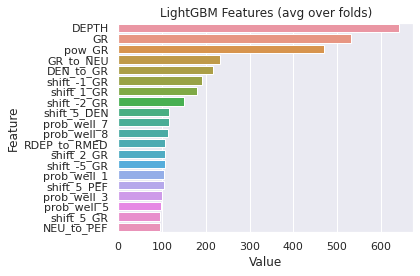

In [ ]:
importance = reg_vsh_lgbm_0.feature_importances_
def plotImp(model, X , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure()
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()

plotImp(reg_vsh_lgbm_0, X_train_0 , num = 20)

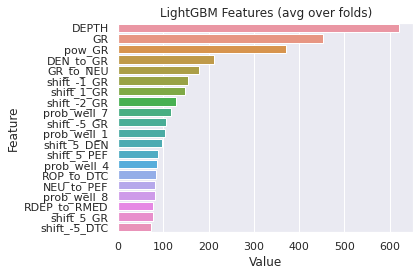

In [ ]:
plotImp(reg_vsh_lgbm_1, X_train_1 , num = 20)

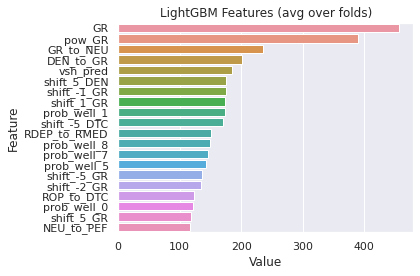

In [ ]:
plotImp(reg_vsh_lgbm_2, X_train_2 , num = 20)

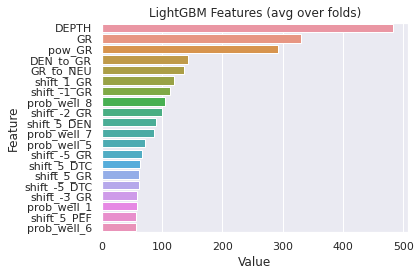

In [ ]:
plotImp(reg_vsh_lgbm_3, X_train_3 , num = 20)

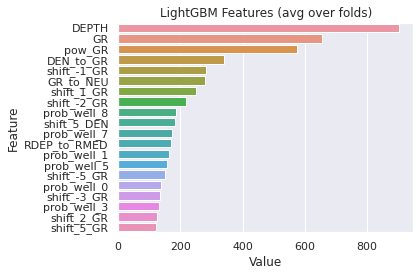

In [ ]:
plotImp(reg_vsh_lgbm_4, X_train_4 , num = 20)

In [ ]:
###pred VSH as variable and create shift (-5,5) VSH

vsh_0 = reg_vsh_lgbm_0.predict(X, num_iteration= reg_vsh_lgbm_0.best_iteration_)
vsh_1 = reg_vsh_lgbm_1.predict(X, num_iteration= reg_vsh_lgbm_1.best_iteration_)
vsh_2 = reg_vsh_lgbm_2.predict(X, num_iteration= reg_vsh_lgbm_2.best_iteration_)
vsh_3 = reg_vsh_lgbm_3.predict(X, num_iteration= reg_vsh_lgbm_3.best_iteration_)
vsh_4 = reg_vsh_lgbm_4.predict(X, num_iteration= reg_vsh_lgbm_4.best_iteration_)

df_vsh['vsh_pred'] = (vsh_0+vsh_1+vsh_2+vsh_3+vsh_4)/5

In [ ]:
df_vsh[['vsh_pred','VSH']]

,vsh_pred,VSH
0,0.732318,0.751631
1,1.023119,1.032475
2,1.502268,1.312757
3,1.680815,1.682292
4,1.935529,1.924398
...,...,...
45095,0.276064,0.273600
45096,0.233935,0.234400
45097,0.204696,0.205400
45098,0.182879,0.179300


In [ ]:
shift_level = [-3,-2,-1,1,2,3]
for j in shift_level:
  name = 'shift_'+str(j)+'_vsh_pred'
  df_vsh[name] = df_vsh['vsh_pred'].shift(j)

In [ ]:
# shift_level = [-3,-2,-1,1,2,3]
# for j in shift_level:
#   name = 'shift_'+str(j)+'_vsh_pred'
#   df_vsh[name] = df_vsh['vsh_pred'].shift(j)

df_vsh['shift_-3_vsh_pred'] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_-3_WELLNUM'],df_vsh['vsh_pred'], df_vsh['shift_-3_vsh_pred'])
df_vsh['shift_-2_vsh_pred'] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_-2_WELLNUM'],df_vsh['vsh_pred'], df_vsh['shift_-2_vsh_pred'])
df_vsh['shift_-1_vsh_pred'] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_-1_WELLNUM'],df_vsh['vsh_pred'], df_vsh['shift_-1_vsh_pred'])
df_vsh['shift_1_vsh_pred'] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_1_WELLNUM'],df_vsh['vsh_pred'], df_vsh['shift_1_vsh_pred'])
df_vsh['shift_2_vsh_pred'] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_2_WELLNUM'],df_vsh['vsh_pred'], df_vsh['shift_2_vsh_pred'])
df_vsh['shift_3_vsh_pred'] = np.where(df_vsh['WELLNUM']!= df_vsh['shift_3_WELLNUM'],df_vsh['vsh_pred'], df_vsh['shift_3_vsh_pred'])

# all_feat = all_feat + ratio_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + range_feat + ['M', 'C','DEPTH'] + shift_feat_list + power_feat + ['shift_-3_vsh_pred','shift_-2_vsh_pred','shift_-1_vsh_pred','shift_1_vsh_pred','shift_2_vsh_pred','shift_3_vsh_pred']+['vsh_pred']
# X = df_vsh[all_feat]
# y = df_vsh[['VSH']]

In [ ]:
all_feat = all_feat + ratio_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + range_feat + ['M', 'C','DEPTH'] + shift_feat_list + power_feat + ['shift_-3_vsh_pred','shift_-2_vsh_pred','shift_-1_vsh_pred','shift_1_vsh_pred','shift_2_vsh_pred','shift_3_vsh_pred']+['vsh_pred']
all_feat = list(dict.fromkeys(all_feat))
X = df_vsh[all_feat]
y = df_vsh[['VSH']]

In [ ]:
len(list(dict.fromkeys(all_feat)))

295

In [ ]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y, test_size=0.15, random_state=4)

X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X, y, test_size=0.15, random_state=23)

vsh_lgbm_5 = lgb.LGBMRegressor(
       objective='regression',num_boost_round= 75,
       metric = 'rmse')

vsh_lgbm_6 = lgb.LGBMRegressor(
       objective='regression',num_boost_round= 75,
       metric = 'rmse')

####final model for reg

reg_vsh_lgbm_5 = vsh_lgbm_5.fit(X_train_5, y_train_5,eval_set=[(X_test_5, y_test_5)],eval_metric='rmse',callbacks=[lgb.early_stopping(10)])

reg_vsh_lgbm_6 = vsh_lgbm_6.fit(X_train_6, y_train_6,eval_set=[(X_test_6, y_test_6)],eval_metric='rmse',callbacks=[lgb.early_stopping(10)])

[1]	valid_0's rmse: 0.231336
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 0.208393
[3]	valid_0's rmse: 0.187804
[4]	valid_0's rmse: 0.169191
[5]	valid_0's rmse: 0.152655
[6]	valid_0's rmse: 0.137603
[7]	valid_0's rmse: 0.124035
[8]	valid_0's rmse: 0.111938
[9]	valid_0's rmse: 0.101023
[10]	valid_0's rmse: 0.0911138
[11]	valid_0's rmse: 0.0822876
[12]	valid_0's rmse: 0.0742043
[13]	valid_0's rmse: 0.0669628
[14]	valid_0's rmse: 0.0605781
[15]	valid_0's rmse: 0.054712
[16]	valid_0's rmse: 0.0495754
[17]	valid_0's rmse: 0.0449485
[18]	valid_0's rmse: 0.0407132
[19]	valid_0's rmse: 0.036959
[20]	valid_0's rmse: 0.0337159
[21]	valid_0's rmse: 0.0307931
[22]	valid_0's rmse: 0.0281587
[23]	valid_0's rmse: 0.0259006
[24]	valid_0's rmse: 0.0239077
[25]	valid_0's rmse: 0.0221409
[26]	valid_0's rmse: 0.0206132
[27]	valid_0's rmse: 0.0193103
[28]	valid_0's rmse: 0.0182018
[29]	valid_0's rmse: 0.0172244
[30]	valid_0's rmse: 0.0164193
[31]	valid_0's rmse: 0.01575

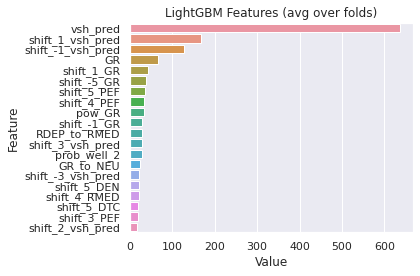

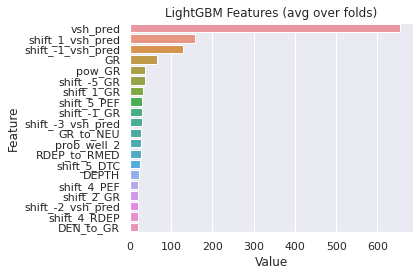

In [ ]:
plotImp(reg_vsh_lgbm_5, X_train_5 , num = 20)

plotImp(reg_vsh_lgbm_6, X_train_6 , num = 20)

### PHIF

In [ ]:
df = df_phif

df.replace(['-9999', -9999], 0, inplace=True)

df = df[(df['missing_RMED'] == 0) & (df['missing_GR']==0) & (df['missing_RDEP']==0) ]

In [ ]:
col_names = ['DTC', 'DTS', 'BS', 'CALI', 'DEN', 'DENC']
clf = IsolationForest(random_state=0).fit_predict(df[col_names])
df = df[clf==1]

In [ ]:
len(df)

35633

In [ ]:
df[df['WELLNUM']==0]

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH,missing_DTC,missing_DTS,missing_BS,missing_DEN,missing_DENC,missing_GR,missing_NEU,missing_PEF,missing_RDEP,missing_RMED,missing_CALI
23067,0,11868.660105,71.3232,0.0,0.0,9.5238,2.4434,0.0,32.0201,0.276100,0.0,1.1802,1.4031,0.0,0.124280,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
24011,0,12340.660105,64.6666,0.0,0.0,9.7143,2.5553,0.0,23.7649,0.152915,0.0,1.7155,1.5136,0.0,0.064103,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
24012,0,12341.160105,68.1576,0.0,0.0,9.8138,2.5405,0.0,33.3443,0.188385,0.0,1.7310,1.6294,0.0,0.074050,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
24013,0,12341.660105,70.6634,0.0,0.0,9.9048,2.5282,0.0,40.6320,0.183532,0.0,1.6039,1.6653,0.0,0.086879,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
24014,0,12342.160105,78.9357,0.0,0.0,9.9048,2.5154,0.0,45.0581,0.198904,0.0,1.4760,1.4915,0.0,0.106588,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29486,0,15078.160105,70.3210,0.0,0.0,9.6190,2.5036,0.0,60.3217,0.136709,0.0,1.7439,1.7235,0.0,0.000000,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
29487,0,15078.660105,70.3697,0.0,0.0,9.6190,2.5174,0.0,61.7658,0.133240,0.0,1.8049,1.7675,0.0,0.000000,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
29488,0,15079.160105,70.3148,0.0,0.0,9.6190,2.5229,0.0,62.6225,0.131827,0.0,1.8364,1.8081,0.0,0.000000,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
29489,0,15079.660105,70.3110,0.0,0.0,9.6190,2.5279,0.0,62.5469,0.131798,0.0,1.8406,1.8470,0.0,0.000000,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0


In [ ]:
core_feat = ['DTC', 'DTS', 'BS', 'CALI', 'DEN', 'DENC','GR','NEU', 'PEF', 'RDEP', 'RMED', 'ROP'] 
null_feat = ['missing_DTC','missing_DTS', 'missing_BS', 'missing_DEN', 'missing_DENC','missing_GR','missing_NEU', 'missing_PEF', 'missing_RDEP','missing_RMED','missing_CALI']

df['DTC_to_DTS'] = df['DTC']/df['DTS']
df['DTS_to_BS'] = df['DTS']/df['BS']
df['BS_to_CALI'] = df['BS']/df['CALI']
df['CALI_to_DEN'] = df['CALI']/df['DEN']
df['DEN_to_DENC'] = df['DEN']/df['DENC']
df['DENC_to_GR'] = df['DENC']/df['GR']
df['GR_to_NEU'] = df['GR']/df['NEU']
df['NEU_to_PEF'] = df['NEU']/df['PEF']
df['PEF_to_RDEP'] = df['PEF']/df['RDEP']
df['RDEP_to_RMED'] = df['RDEP']/df['RMED']
df['RMED_to_ROP'] = df['RMED']/df['ROP']
df['ROP_to_DTC'] = df['ROP']/df['DTC']
df['DTC_to_BS'] = df['DTC']/df['BS']
df['DTS_to_CALI'] = df['DTS']/df['CALI']
df['BS_to_DEN'] = df['BS']/df['DEN']
df['CALI_to_DENC'] = df['CALI']/df['DENC']
df['DEN_to_GR'] = df['DEN']/df['GR']
df['DENC_to_NEU'] = df['DENC']/df['NEU']

###log

for i in core_feat:
  feat = 'ln_'+i
  df[feat] = np.log(df[i])


  ###outlier
df['is_outlier_DTC'] = np.where( df['DTC'] > 95 , 1, 0 )
df['is_outlier_DTS'] = np.where( df['DTS'] > 152 , 1, 0 )
df['is_outlier_BS'] = np.where( df['BS'] > 8.6 , 1, 0 )
df['is_outlier_CALI'] = np.where( df['CALI'] > 8.8 , 1, 0 )
df['is_outlier_DEN'] = np.where( df['DEN'] > 2.7 , 1, 0 )
df['is_outlier_DENC'] = np.where( df['DENC'] > 0.09 , 1, 0 )
df['is_outlier_GR'] = np.where( df['GR'] > 89 , 1, 0 )
df['is_outlier_GR_2'] = np.where( df['GR'] > 120 , 1, 0 )
df['is_outlier_GR_3'] = np.where( df['GR'] > 200 , 1, 0 )
df['is_outlier_NEU'] = np.where( df['NEU'] > 0.32 , 1, 0 )
df['is_outlier_PEF'] = np.where( df['PEF'] > 8.5 , 1, 0 )
df['is_outlier_RDEP'] = np.where( df['RDEP'] > 30 , 1, 0 )
df['is_outlier_RDEP'] = np.where( df['RDEP'] > 120 , 1, 0 )
df['is_outlier_RMED']= np.where( df['RMED'] > 530, 1, 0 )
df['is_outlier_ROP']= np.where( df['ROP'] > 37 , 1, 0 )

all_feat = core_feat + null_feat
ratio_feat = ['BS_to_CALI', 'CALI_to_DEN', 'DEN_to_DENC', 'DENC_to_GR', 'GR_to_NEU','NEU_to_PEF', 'PEF_to_RDEP', 'RDEP_to_RMED', 'RMED_to_ROP','ROP_to_DTC']
log_feat = ['ln_DTC', 'ln_DTS', 'ln_BS', 'ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU', 'ln_PEF', 'ln_RDEP', 'ln_RMED', 'ln_ROP']
out_lier_feat = ['is_outlier_DTC', 'is_outlier_DTS', 'is_outlier_BS', 'is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU', 'is_outlier_PEF','is_outlier_RDEP', 'is_outlier_RMED', 'is_outlier_ROP']

all_feat = all_feat + ratio_feat + log_feat + out_lier_feat
X = df[all_feat]

In [ ]:
###predictive feature

well_proba = full_well_lgbm_classifi.predict_proba(X)

p_well_cols = []
for i in range(0,9):
  name = 'prob_well_'+str(i)
  p_well_cols.append(name)

df_well_proba = pd.DataFrame(well_proba, columns =p_well_cols)

line_proba = full_line_classifi.predict(X)
p_l_cols = []
for i in range(1,24):
  name = 'p_l_'+str(i)
  p_l_cols.append(name)

df_line_proba = pd.DataFrame(line_proba, columns =p_l_cols)

df = pd.concat([df.reset_index(), df_line_proba],  axis=1)
df = df.drop(columns=['index'])
df = pd.concat([df, df_well_proba],  axis=1)


df['line_num'] = df.apply(group_line,axis =1)

df['M'] = df['line_num'].apply(group_M)
df['C'] = df['line_num'].apply(group_C)

In [ ]:
####min max of well
df = df.merge(df_DTC_group, on='WELLNUM', how='left')
df = df.merge(df_DTS_group, on='WELLNUM', how='left')
df = df.merge(df_BS_group, on='WELLNUM', how='left')
df = df.merge(df_CALI_group, on='WELLNUM', how='left')
df = df.merge(df_DEN_group, on='WELLNUM', how='left')
df = df.merge(df_DENC_group, on='WELLNUM', how='left')
df = df.merge(df_GR_group, on='WELLNUM', how='left')
df = df.merge(df_NEU_group, on='WELLNUM', how='left')
df = df.merge(df_PEF_group, on='WELLNUM', how='left')
df = df.merge(df_RDEP_group, on='WELLNUM', how='left')
df = df.merge(df_RMED_group, on='WELLNUM', how='left')
df = df.merge(df_ROP_group, on='WELLNUM', how='left')

####shift related feature

####Shift 1, 2, -1, -2  of null use same_rows
shift_feat = ['WELLNUM'] + ['CALI', 'DEN', 'DENC','GR','NEU']
shift_level = [-3,-2,-1,1,2,3]
for i in shift_feat:
  for j in shift_level:
    name = 'shift_'+str(j)+'_'+i
    df[name] = df[i].shift(j)

### fixed wrong well shift
for i in ['CALI', 'DEN', 'DENC','GR','NEU']:
  shift_name_1 = 'shift_-3_'+i
  shift_name_2 = 'shift_-2_'+i
  shift_name_3 = 'shift_-1_'+i
  shift_name_4 = 'shift_1_'+i
  shift_name_5 = 'shift_2_'+i
  shift_name_6 = 'shift_3_'+i
  df[shift_name_1] = np.where(df['WELLNUM']!= df['shift_-3_WELLNUM'],df[i], df[shift_name_1])
  df[shift_name_2] = np.where(df['WELLNUM']!= df['shift_-2_WELLNUM'],df[i], df[shift_name_2])
  df[shift_name_3] = np.where(df['WELLNUM']!= df['shift_-1_WELLNUM'],df[i], df[shift_name_3])
  df[shift_name_4] = np.where(df['WELLNUM']!= df['shift_1_WELLNUM'],df[i], df[shift_name_4])
  df[shift_name_5] = np.where(df['WELLNUM']!= df['shift_2_WELLNUM'],df[i], df[shift_name_5])
  df[shift_name_6] = np.where(df['WELLNUM']!= df['shift_3_WELLNUM'],df[i], df[shift_name_6])


In [ ]:
####petro physics feat

df['correct_denc'] = df['DEN']+df['DENC']
df['cden_poro'] = (2.65-df['correct_denc'])/(2.65-1)
df['avg_poro'] = (df['cden_poro']+df['NEU'])/2

In [ ]:
df = df.fillna(0)

In [ ]:
df['VSH'] = np.where( df['VSH'] > 1 , 1, df['VSH'] )
df['VSH'] = np.where( df['VSH'] < 0 , 0, df['VSH'] )

In [ ]:
df = df.fillna(0)

core_feat = ['CALI', 'DEN', 'DENC','GR','NEU'] 
null_feat = ['missing_DEN', 'missing_DENC','missing_GR','missing_NEU','missing_CALI']

all_feat = core_feat + null_feat

###petro physics feat


log_feat = ['ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU']
out_lier_feat = ['is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU']

range_feat = []
for i in core_feat:
  for j in [ '_mean','_min','_max','_std','_median']:
    range_feat.append(i+j)

shift_level = [-3,-2,-1,1,2,3]
shift_feat_list = []
for i in core_feat:
  for j in shift_level:
    name = 'shift_'+str(j)+'_'+i
    shift_feat_list.append(name)

all_feat = all_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + ['M', 'C'] + ['VSH'] + range_feat + shift_feat_list +['correct_denc','cden_poro','avg_poro']+ ['WELLNUM']
X = df[all_feat]
y = df[['PHIF','WELLNUM']]


In [ ]:
###test split แบบ ราบ well

X_train_0 = X[X['WELLNUM']!= 0]
X_test_0 = X[X['WELLNUM']== 0]
y_train_0 = y[y['WELLNUM']!= 0]
y_test_0 = y[y['WELLNUM']== 0]
##############################
X_train_1 = X[X['WELLNUM']!= 1]
X_test_1 = X[X['WELLNUM']== 1]
y_train_1 = y[y['WELLNUM']!= 1]
y_test_1 = y[y['WELLNUM']== 1]
##############################
X_train_2 = X[X['WELLNUM']!= 2]
X_test_2 = X[X['WELLNUM']== 2]
y_train_2 = y[y['WELLNUM']!= 2]
y_test_2 = y[y['WELLNUM']== 2]
##############################
X_train_3 = X[X['WELLNUM']!= 3]
X_test_3 = X[X['WELLNUM']== 3]
y_train_3 = y[y['WELLNUM']!= 3]
y_test_3 = y[y['WELLNUM']== 3]
##############################
X_train_4 = X[X['WELLNUM']!= 4]
X_test_4 = X[X['WELLNUM']== 4]
y_train_4 = y[y['WELLNUM']!= 4]
y_test_4 = y[y['WELLNUM']== 4]
##############################
X_train_5 = X[X['WELLNUM']!= 5]
X_test_5 = X[X['WELLNUM']== 5]
y_train_5 = y[y['WELLNUM']!= 5]
y_test_5 = y[y['WELLNUM']== 5]
##############################
X_train_6 = X[X['WELLNUM']!= 6]
X_test_6 = X[X['WELLNUM']== 6]
y_train_6 = y[y['WELLNUM']!= 6]
y_test_6 = y[y['WELLNUM']== 6]
##############################
X_train_7 = X[X['WELLNUM']!= 7]
X_test_7 = X[X['WELLNUM']== 7]
y_train_7 = y[y['WELLNUM']!= 7]
y_test_7 = y[y['WELLNUM']== 7]
##############################
X_train_8 = X[X['WELLNUM']!= 8]
X_test_8 = X[X['WELLNUM']== 8]
y_train_8 = y[y['WELLNUM']!= 8]
y_test_8 = y[y['WELLNUM']== 8]
##############################

X_train_0 = X_train_0.drop(columns=['WELLNUM'])
X_train_1 = X_train_1.drop(columns=['WELLNUM'])
X_train_2 = X_train_2.drop(columns=['WELLNUM'])
X_train_3 = X_train_3.drop(columns=['WELLNUM'])
X_train_4 = X_train_4.drop(columns=['WELLNUM'])
X_train_5 = X_train_5.drop(columns=['WELLNUM'])
X_train_6 = X_train_6.drop(columns=['WELLNUM'])
X_train_7 = X_train_7.drop(columns=['WELLNUM'])
X_train_8 = X_train_8.drop(columns=['WELLNUM'])

X_test_0 = X_test_0.drop(columns=['WELLNUM'])
X_test_1 = X_test_1.drop(columns=['WELLNUM'])
X_test_2 = X_test_2.drop(columns=['WELLNUM'])
X_test_3 = X_test_3.drop(columns=['WELLNUM'])
X_test_4 = X_test_4.drop(columns=['WELLNUM'])
X_test_5 = X_test_5.drop(columns=['WELLNUM'])
X_test_6 = X_test_6.drop(columns=['WELLNUM'])
X_test_7 = X_test_7.drop(columns=['WELLNUM'])
X_test_8 = X_test_8.drop(columns=['WELLNUM'])


y_train_0 = y_train_0.drop(columns=['WELLNUM'])
y_train_1 = y_train_1.drop(columns=['WELLNUM'])
y_train_2 = y_train_2.drop(columns=['WELLNUM'])
y_train_3 = y_train_3.drop(columns=['WELLNUM'])
y_train_4 = y_train_4.drop(columns=['WELLNUM'])
y_train_5 = y_train_5.drop(columns=['WELLNUM'])
y_train_6 = y_train_6.drop(columns=['WELLNUM'])
y_train_7 = y_train_7.drop(columns=['WELLNUM'])
y_train_8 = y_train_8.drop(columns=['WELLNUM'])


y_test_0 = y_test_0.drop(columns=['WELLNUM'])
y_test_1 = y_test_1.drop(columns=['WELLNUM'])
y_test_2 = y_test_2.drop(columns=['WELLNUM'])
y_test_3 = y_test_3.drop(columns=['WELLNUM'])
y_test_4 = y_test_4.drop(columns=['WELLNUM'])
y_test_5 = y_test_5.drop(columns=['WELLNUM'])
y_test_6 = y_test_6.drop(columns=['WELLNUM'])
y_test_7 = y_test_7.drop(columns=['WELLNUM'])
y_test_8 = y_test_8.drop(columns=['WELLNUM'])

In [ ]:

phif_lgbm_0 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
phif_lgbm_1 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
phif_lgbm_2 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
phif_lgbm_3 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
phif_lgbm_4 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
phif_lgbm_5 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
phif_lgbm_6 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
phif_lgbm_7 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
phif_lgbm_8 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')

reg_phif_lgbm_0 = phif_lgbm_0.fit(X_train_0, y_train_0,eval_set=[(X_test_0, y_test_0)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_phif_lgbm_1 = phif_lgbm_1.fit(X_train_1, y_train_1,eval_set=[(X_test_1, y_test_1)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_phif_lgbm_2 = phif_lgbm_2.fit(X_train_2, y_train_2,eval_set=[(X_test_2, y_test_2)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_phif_lgbm_3 = phif_lgbm_3.fit(X_train_3, y_train_3,eval_set=[(X_test_3, y_test_3)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_phif_lgbm_4 = phif_lgbm_4.fit(X_train_4, y_train_4,eval_set=[(X_test_4, y_test_4)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_phif_lgbm_5 = phif_lgbm_5.fit(X_train_5, y_train_5,eval_set=[(X_test_5, y_test_5)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_phif_lgbm_6 = phif_lgbm_6.fit(X_train_6, y_train_6,eval_set=[(X_test_6, y_test_6)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_phif_lgbm_7 = phif_lgbm_7.fit(X_train_7, y_train_7,eval_set=[(X_test_7, y_test_7)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_phif_lgbm_8 = phif_lgbm_8.fit(X_train_8, y_train_8,eval_set=[(X_test_8, y_test_8)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])

[1]	valid_0's rmse: 0.0865166
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's rmse: 0.0797724
[3]	valid_0's rmse: 0.0738348
[4]	valid_0's rmse: 0.068557
[5]	valid_0's rmse: 0.0639079
[6]	valid_0's rmse: 0.0598001
[7]	valid_0's rmse: 0.0561985
[8]	valid_0's rmse: 0.053023
[9]	valid_0's rmse: 0.0502395
[10]	valid_0's rmse: 0.0478814
[11]	valid_0's rmse: 0.0457669
[12]	valid_0's rmse: 0.0439174
[13]	valid_0's rmse: 0.0423291
[14]	valid_0's rmse: 0.0409887
[15]	valid_0's rmse: 0.039738
[16]	valid_0's rmse: 0.0387068
[17]	valid_0's rmse: 0.0378073
[18]	valid_0's rmse: 0.0369618
[19]	valid_0's rmse: 0.0362496
[20]	valid_0's rmse: 0.035665
[21]	valid_0's rmse: 0.0351344
[22]	valid_0's rmse: 0.0346529
[23]	valid_0's rmse: 0.0342731
[24]	valid_0's rmse: 0.0339638
[25]	valid_0's rmse: 0.0336697
[26]	valid_0's rmse: 0.0333838
[27]	valid_0's rmse: 0.0331439
[28]	valid_0's rmse: 0.0329659
[29]	valid_0's rmse: 0.0328256
[30]	valid_0's rmse: 0.0326699
[31]	valid_0's rmse: 

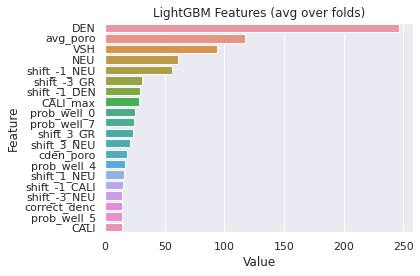

In [ ]:
plotImp(reg_phif_lgbm_3, X_train_3 , num = 20)

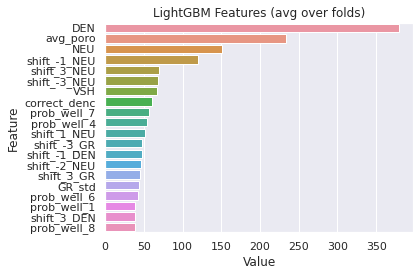

In [ ]:
plotImp(reg_phif_lgbm_0, X_train_0 , num = 20)

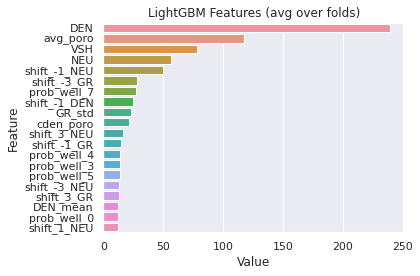

In [ ]:
plotImp(reg_phif_lgbm_2, X_train_2 , num = 20)

In [ ]:
###pred VSH as variable and create shift (-5,5) VSH
X = X.drop(columns=['WELLNUM'])

phif_0 = reg_phif_lgbm_0.predict(X, num_iteration= reg_phif_lgbm_0.best_iteration_)
phif_1 = reg_phif_lgbm_1.predict(X, num_iteration= reg_phif_lgbm_1.best_iteration_)
phif_2 = reg_phif_lgbm_2.predict(X, num_iteration= reg_phif_lgbm_2.best_iteration_)
phif_3 = reg_phif_lgbm_3.predict(X, num_iteration= reg_phif_lgbm_3.best_iteration_)
phif_4 = reg_phif_lgbm_4.predict(X, num_iteration= reg_phif_lgbm_4.best_iteration_)
phif_5 = reg_phif_lgbm_5.predict(X, num_iteration= reg_phif_lgbm_5.best_iteration_)
phif_6 = reg_phif_lgbm_6.predict(X, num_iteration= reg_phif_lgbm_6.best_iteration_)
phif_7 = reg_phif_lgbm_7.predict(X, num_iteration= reg_phif_lgbm_7.best_iteration_)
phif_8 = reg_phif_lgbm_8.predict(X, num_iteration= reg_phif_lgbm_8.best_iteration_)

df['phif_pred'] = (phif_0 + phif_1 + phif_2 + phif_3 + phif_4 + phif_5 + phif_6 + phif_7 + phif_8)/9

In [ ]:
df[['phif_pred','PHIF']] 

,phif_pred,PHIF
0,0.116366,0.124280
1,0.040499,0.064103
2,0.066818,0.074050
3,0.085298,0.086879
4,0.100936,0.106588
...,...,...
35628,0.027687,0.028313
35629,0.027749,0.027530
35630,0.025236,0.023795
35631,0.024499,0.022048


In [ ]:
shift_level = [-3,-2,-1,1,2,3]
for j in shift_level:
  name = 'shift_'+str(j)+'_phif_pred'
  df[name] = df['phif_pred'].shift(j)

df['shift_-3_phif_pred'] = np.where(df['WELLNUM']!= df['shift_-3_WELLNUM'],df['phif_pred'], df['shift_-3_phif_pred'])
df['shift_-2_phif_pred'] = np.where(df['WELLNUM']!= df['shift_-2_WELLNUM'],df['phif_pred'], df['shift_-2_phif_pred'])
df['shift_-1_phif_pred'] = np.where(df['WELLNUM']!= df['shift_-1_WELLNUM'],df['phif_pred'], df['shift_-1_phif_pred'])
df['shift_1_phif_pred'] = np.where(df['WELLNUM']!= df['shift_1_WELLNUM'],df['phif_pred'], df['shift_1_phif_pred'])
df['shift_2_phif_pred'] = np.where(df['WELLNUM']!= df['shift_2_WELLNUM'],df['phif_pred'], df['shift_2_phif_pred'])
df['shift_3_phif_pred'] = np.where(df['WELLNUM']!= df['shift_3_WELLNUM'],df['phif_pred'], df['shift_3_phif_pred'])

df = df.fillna(0)

core_feat = ['CALI', 'DEN', 'DENC','GR','NEU'] 
null_feat = ['missing_DEN', 'missing_DENC','missing_GR','missing_NEU','missing_CALI']

all_feat = core_feat + null_feat

log_feat = ['ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU']
out_lier_feat = ['is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU']

range_feat = []
for i in core_feat:
  for j in [ '_mean','_min','_max','_std','_median']:
    range_feat.append(i+j)

shift_level = [-3,-2,-1,1,2,3]
shift_feat_list = []
for i in core_feat:
  for j in shift_level:
    name = 'shift_'+str(j)+'_'+i
    shift_feat_list.append(name)

all_feat = all_feat + ratio_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + range_feat + ['M', 'C'] + ['VSH'] + range_feat + shift_feat_list + ['correct_denc','cden_poro','avg_poro'] + ['shift_-3_phif_pred','shift_-2_phif_pred','shift_-1_phif_pred','shift_1_phif_pred']+ ['phif_pred'] + ['shift_2_phif_pred']+['shift_3_phif_pred']
all_feat = list(dict.fromkeys(all_feat))
X = df[all_feat]
y = df[['PHIF']]

In [ ]:
####final PHIF model

X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X, y, test_size=0.15, random_state=4)

X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X, y, test_size=0.15, random_state=23)

phif_lgbm_9 = lgb.LGBMRegressor(
       objective='regression',num_boost_round= 120,
       metric = 'rmse')

phif_lgbm_10 = lgb.LGBMRegressor(
       objective='regression',num_boost_round= 120,
       metric = 'rmse')

####final model for reg

reg_phif_lgbm_9 = phif_lgbm_9.fit(X_train_9, y_train_9,eval_set=[(X_test_9, y_test_9)],eval_metric='rmse',callbacks=[lgb.early_stopping(20)])

reg_phif_lgbm_10 = phif_lgbm_10.fit(X_train_10, y_train_10,eval_set=[(X_test_10, y_test_10)],eval_metric='rmse',callbacks=[lgb.early_stopping(20)])

[1]	valid_0's rmse: 0.0710881
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's rmse: 0.0640095
[3]	valid_0's rmse: 0.0576518
[4]	valid_0's rmse: 0.0519322
[5]	valid_0's rmse: 0.0467899
[6]	valid_0's rmse: 0.0421645
[7]	valid_0's rmse: 0.0380055
[8]	valid_0's rmse: 0.0342715
[9]	valid_0's rmse: 0.030919
[10]	valid_0's rmse: 0.0279073
[11]	valid_0's rmse: 0.0252073
[12]	valid_0's rmse: 0.0227845
[13]	valid_0's rmse: 0.0206144
[14]	valid_0's rmse: 0.0186703
[15]	valid_0's rmse: 0.0169277
[16]	valid_0's rmse: 0.0153782
[17]	valid_0's rmse: 0.0139958
[18]	valid_0's rmse: 0.0127605
[19]	valid_0's rmse: 0.011667
[20]	valid_0's rmse: 0.0106951
[21]	valid_0's rmse: 0.00983421
[22]	valid_0's rmse: 0.00907414
[23]	valid_0's rmse: 0.00841076
[24]	valid_0's rmse: 0.0078251
[25]	valid_0's rmse: 0.00732235
[26]	valid_0's rmse: 0.00688254
[27]	valid_0's rmse: 0.00650153
[28]	valid_0's rmse: 0.0061771
[29]	valid_0's rmse: 0.00589277
[30]	valid_0's rmse: 0.00565243
[31]	valid_

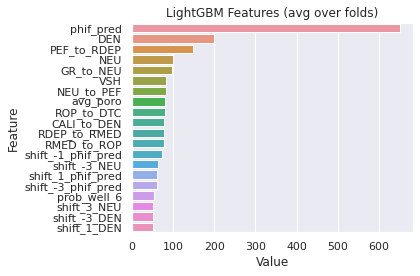

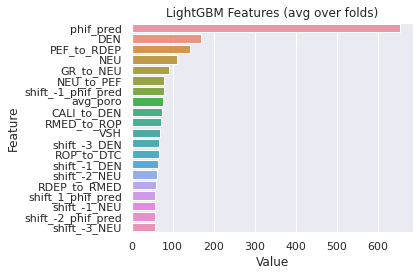

In [ ]:
plotImp(reg_phif_lgbm_9, X_train_9 , num = 20)

plotImp(reg_phif_lgbm_10, X_train_10 , num = 20)

### SW predict

In [ ]:
df = df_sw

df.replace(['-9999', -9999], 0, inplace=True)

df = df[(df['missing_RMED'] == 0) & (df['missing_GR']==0) & (df['missing_RDEP']==0) ]

In [ ]:
col_names = ['DTC', 'DTS','BS', 'CALI', 'DEN', 'DENC'] 
clf = IsolationForest(random_state=0).fit_predict(df[col_names])
df = df[clf==1]

In [ ]:
df[df['WELLNUM']==0]

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH,missing_DTC,missing_DTS,missing_BS,missing_DEN,missing_DENC,missing_GR,missing_NEU,missing_PEF,missing_RDEP,missing_RMED,missing_CALI
23067,0,11868.660105,71.3232,0.0,0.0,9.5238,2.4434,0.0,32.0201,0.276100,0.0,1.1802,1.4031,0.0,0.124280,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
24011,0,12340.660105,64.6666,0.0,0.0,9.7143,2.5553,0.0,23.7649,0.152915,0.0,1.7155,1.5136,0.0,0.064103,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
24012,0,12341.160105,68.1576,0.0,0.0,9.8138,2.5405,0.0,33.3443,0.188385,0.0,1.7310,1.6294,0.0,0.074050,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
24013,0,12341.660105,70.6634,0.0,0.0,9.9048,2.5282,0.0,40.6320,0.183532,0.0,1.6039,1.6653,0.0,0.086879,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
24014,0,12342.160105,78.9357,0.0,0.0,9.9048,2.5154,0.0,45.0581,0.198904,0.0,1.4760,1.4915,0.0,0.106588,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29486,0,15078.160105,70.3210,0.0,0.0,9.6190,2.5036,0.0,60.3217,0.136709,0.0,1.7439,1.7235,0.0,0.000000,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
29487,0,15078.660105,70.3697,0.0,0.0,9.6190,2.5174,0.0,61.7658,0.133240,0.0,1.8049,1.7675,0.0,0.000000,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
29488,0,15079.160105,70.3148,0.0,0.0,9.6190,2.5229,0.0,62.6225,0.131827,0.0,1.8364,1.8081,0.0,0.000000,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0
29489,0,15079.660105,70.3110,0.0,0.0,9.6190,2.5279,0.0,62.5469,0.131798,0.0,1.8406,1.8470,0.0,0.000000,1.0,0.0,0,1,1,0,1,0,0,1,0,0,0


In [ ]:
len(df)

35633

In [ ]:
core_feat = ['DTC', 'DTS', 'BS', 'CALI', 'DEN', 'DENC','GR','NEU', 'PEF', 'RDEP', 'RMED', 'ROP'] 
null_feat = ['missing_DTC','missing_DTS', 'missing_BS', 'missing_DEN', 'missing_DENC','missing_GR','missing_NEU', 'missing_PEF', 'missing_RDEP','missing_RMED','missing_CALI']

df['DTC_to_DTS'] = df['DTC']/df['DTS']
df['DTS_to_BS'] = df['DTS']/df['BS']
df['BS_to_CALI'] = df['BS']/df['CALI']
df['CALI_to_DEN'] = df['CALI']/df['DEN']
df['DEN_to_DENC'] = df['DEN']/df['DENC']
df['DENC_to_GR'] = df['DENC']/df['GR']
df['GR_to_NEU'] = df['GR']/df['NEU']
df['NEU_to_PEF'] = df['NEU']/df['PEF']
df['PEF_to_RDEP'] = df['PEF']/df['RDEP']
df['RDEP_to_RMED'] = df['RDEP']/df['RMED']
df['RMED_to_ROP'] = df['RMED']/df['ROP']
df['ROP_to_DTC'] = df['ROP']/df['DTC']
df['DTC_to_BS'] = df['DTC']/df['BS']
df['DTS_to_CALI'] = df['DTS']/df['CALI']
df['BS_to_DEN'] = df['BS']/df['DEN']
df['CALI_to_DENC'] = df['CALI']/df['DENC']
df['DEN_to_GR'] = df['DEN']/df['GR']
df['DENC_to_NEU'] = df['DENC']/df['NEU']

###log

for i in core_feat:
  feat = 'ln_'+i
  df[feat] = np.log(df[i])


  ###outlier
df['is_outlier_DTC'] = np.where( df['DTC'] > 95 , 1, 0 )
df['is_outlier_DTS'] = np.where( df['DTS'] > 152 , 1, 0 )
df['is_outlier_BS'] = np.where( df['BS'] > 8.6 , 1, 0 )
df['is_outlier_CALI'] = np.where( df['CALI'] > 8.8 , 1, 0 )
df['is_outlier_DEN'] = np.where( df['DEN'] > 2.7 , 1, 0 )
df['is_outlier_DENC'] = np.where( df['DENC'] > 0.09 , 1, 0 )
df['is_outlier_GR'] = np.where( df['GR'] > 89 , 1, 0 )
df['is_outlier_GR_2'] = np.where( df['GR'] > 120 , 1, 0 )
df['is_outlier_GR_3'] = np.where( df['GR'] > 200 , 1, 0 )
df['is_outlier_NEU'] = np.where( df['NEU'] > 0.32 , 1, 0 )
df['is_outlier_PEF'] = np.where( df['PEF'] > 8.5 , 1, 0 )
df['is_outlier_RDEP'] = np.where( df['RDEP'] > 30 , 1, 0 )
df['is_outlier_RDEP'] = np.where( df['RDEP'] > 120 , 1, 0 )
df['is_outlier_RMED']= np.where( df['RMED'] > 530, 1, 0 )
df['is_outlier_ROP']= np.where( df['ROP'] > 37 , 1, 0 )

all_feat = core_feat + null_feat
ratio_feat = ['BS_to_CALI', 'CALI_to_DEN', 'DEN_to_DENC', 'DENC_to_GR', 'GR_to_NEU','NEU_to_PEF', 'PEF_to_RDEP', 'RDEP_to_RMED', 'RMED_to_ROP','ROP_to_DTC']
log_feat = ['ln_DTC', 'ln_DTS', 'ln_BS', 'ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU', 'ln_PEF', 'ln_RDEP', 'ln_RMED', 'ln_ROP']
out_lier_feat = ['is_outlier_DTC', 'is_outlier_DTS', 'is_outlier_BS', 'is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU', 'is_outlier_PEF','is_outlier_RDEP', 'is_outlier_RMED', 'is_outlier_ROP']

all_feat = all_feat + ratio_feat + log_feat + out_lier_feat
X = df[all_feat]

In [ ]:
###predictive feature

well_proba = full_well_lgbm_classifi.predict_proba(X)

p_well_cols = []
for i in range(0,9):
  name = 'prob_well_'+str(i)
  p_well_cols.append(name)

df_well_proba = pd.DataFrame(well_proba, columns =p_well_cols)

line_proba = full_line_classifi.predict(X)
p_l_cols = []
for i in range(1,24):
  name = 'p_l_'+str(i)
  p_l_cols.append(name)

df_line_proba = pd.DataFrame(line_proba, columns =p_l_cols)

df = pd.concat([df.reset_index(), df_line_proba],  axis=1)
df = df.drop(columns=['index'])
df = pd.concat([df, df_well_proba],  axis=1)


df['line_num'] = df.apply(group_line,axis =1)

df['M'] = df['line_num'].apply(group_M)
df['C'] = df['line_num'].apply(group_C)

In [ ]:
####min max of well
df = df.merge(df_DTC_group, on='WELLNUM', how='left')
df = df.merge(df_DTS_group, on='WELLNUM', how='left')
df = df.merge(df_BS_group, on='WELLNUM', how='left')
df = df.merge(df_CALI_group, on='WELLNUM', how='left')
df = df.merge(df_DEN_group, on='WELLNUM', how='left')
df = df.merge(df_DENC_group, on='WELLNUM', how='left')
df = df.merge(df_GR_group, on='WELLNUM', how='left')
df = df.merge(df_NEU_group, on='WELLNUM', how='left')
df = df.merge(df_PEF_group, on='WELLNUM', how='left')
df = df.merge(df_RDEP_group, on='WELLNUM', how='left')
df = df.merge(df_RMED_group, on='WELLNUM', how='left')
df = df.merge(df_ROP_group, on='WELLNUM', how='left')

####shift related feature

####Shift 1, 2, -1, -2  of null use same_rows
shift_feat = ['WELLNUM'] + ['CALI', 'DEN', 'DENC','GR','NEU','RDEP', 'RMED', 'ROP']
shift_level = [-3,-2,-1,1,2,3]
for i in shift_feat:
  for j in shift_level:
    name = 'shift_'+str(j)+'_'+i
    df[name] = df[i].shift(j)

### fixed wrong well shift
for i in ['CALI', 'DEN', 'DENC','GR','NEU','RDEP', 'RMED', 'ROP']:
  shift_name_1 = 'shift_-3_'+i
  shift_name_2 = 'shift_-2_'+i
  shift_name_3 = 'shift_-1_'+i
  shift_name_4 = 'shift_1_'+i
  shift_name_5 = 'shift_2_'+i
  shift_name_6 = 'shift_3_'+i
  df[shift_name_1] = np.where(df['WELLNUM']!= df['shift_-3_WELLNUM'],df[i], df[shift_name_1])
  df[shift_name_2] = np.where(df['WELLNUM']!= df['shift_-2_WELLNUM'],df[i], df[shift_name_2])
  df[shift_name_3] = np.where(df['WELLNUM']!= df['shift_-1_WELLNUM'],df[i], df[shift_name_3])
  df[shift_name_4] = np.where(df['WELLNUM']!= df['shift_1_WELLNUM'],df[i], df[shift_name_4])
  df[shift_name_5] = np.where(df['WELLNUM']!= df['shift_2_WELLNUM'],df[i], df[shift_name_5])
  df[shift_name_6] = np.where(df['WELLNUM']!= df['shift_3_WELLNUM'],df[i], df[shift_name_6])


In [ ]:
df = df.fillna(0)

In [ ]:
# all_feat = core_feat + null_feat
# ratio_feat = ['BS_to_CALI', 'CALI_to_DEN', 'DEN_to_DENC', 'DENC_to_GR', 'GR_to_NEU','NEU_to_PEF', 'PEF_to_RDEP', 'RDEP_to_RMED', 'RMED_to_ROP','ROP_to_DTC','DTC_to_BS','DTS_to_CALI','BS_to_DEN','CALI_to_DENC','DEN_to_GR','DENC_to_NEU']
# log_feat = ['ln_DTC', 'ln_DTS', 'ln_BS', 'ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU', 'ln_PEF', 'ln_RDEP', 'ln_RMED', 'ln_ROP']
# out_lier_feat = ['is_outlier_DTC', 'is_outlier_DTS', 'is_outlier_BS', 'is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU', 'is_outlier_PEF','is_outlier_RDEP', 'is_outlier_RMED', 'is_outlier_ROP']

# all_feat = all_feat + ratio_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + ['M', 'C'] +['WELLNUM']
# X = df[all_feat]

# df['vsh_pred'] = best_vsh_lgb.predict(X)

In [ ]:
df['RDEP_to_RMED'] = df['RDEP']/df['RMED']
df['RMED_to_ROP'] = df['RMED']/df['ROP']
df['ROP_to_RDEP'] = df['ROP']/df['RDEP']

In [ ]:
df['VSH'] = np.where( df['VSH'] > 1 , 1, df['VSH'] )
df['VSH'] = np.where( df['VSH'] < 0 , 0, df['VSH'] )

In [ ]:
core_feat = [ 'CALI', 'DEN', 'DENC','GR','NEU', 'RDEP', 'RMED', 'ROP'] 
null_feat = ['missing_DEN', 'missing_DENC','missing_GR','missing_NEU', 'missing_RDEP','missing_RMED','missing_CALI']

all_feat = core_feat + null_feat


log_feat = ['ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU', 'ln_RDEP', 'ln_RMED', 'ln_ROP']
out_lier_feat = ['is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU','is_outlier_RDEP', 'is_outlier_RMED', 'is_outlier_ROP']

range_feat = []
for i in [ 'CALI', 'DEN', 'DENC','GR','NEU', 'RDEP', 'RMED', 'ROP']:
  for j in [ '_mean','_min','_max','_std','_median']:
    range_feat.append(i+j)

shift_level = [-3,-2,-1,1,2,3]
shift_feat_list = []
for i in [ 'CALI', 'DEN', 'DENC','GR','NEU', 'RDEP', 'RMED', 'ROP']:
  for j in shift_level:
    name = 'shift_'+str(j)+'_'+i
    shift_feat_list.append(name)

df['RDEP_to_RMED'] = df['RDEP']/df['RMED']
df['RMED_to_ROP'] = df['RMED']/df['ROP']
df['ROP_to_RDEP'] = df['ROP']/df['RDEP']

all_feat = all_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + ['M', 'C','VSH'] + range_feat + shift_feat_list + ['WELLNUM'] + ['RDEP_to_RMED']+['RMED_to_ROP']+['ROP_to_RDEP']
X = df[all_feat]
y = df[['SW','WELLNUM']]


In [ ]:
###test split แบบ ราบ well

X_train_0 = X[X['WELLNUM']!= 0]
X_test_0 = X[X['WELLNUM']== 0]
y_train_0 = y[y['WELLNUM']!= 0]
y_test_0 = y[y['WELLNUM']== 0]
##############################
X_train_1 = X[X['WELLNUM']!= 1]
X_test_1 = X[X['WELLNUM']== 1]
y_train_1 = y[y['WELLNUM']!= 1]
y_test_1 = y[y['WELLNUM']== 1]
##############################
X_train_2 = X[X['WELLNUM']!= 2]
X_test_2 = X[X['WELLNUM']== 2]
y_train_2 = y[y['WELLNUM']!= 2]
y_test_2 = y[y['WELLNUM']== 2]
##############################
X_train_3 = X[X['WELLNUM']!= 3]
X_test_3 = X[X['WELLNUM']== 3]
y_train_3 = y[y['WELLNUM']!= 3]
y_test_3 = y[y['WELLNUM']== 3]
##############################
X_train_4 = X[X['WELLNUM']!= 4]
X_test_4 = X[X['WELLNUM']== 4]
y_train_4 = y[y['WELLNUM']!= 4]
y_test_4 = y[y['WELLNUM']== 4]
##############################
X_train_5 = X[X['WELLNUM']!= 5]
X_test_5 = X[X['WELLNUM']== 5]
y_train_5 = y[y['WELLNUM']!= 5]
y_test_5 = y[y['WELLNUM']== 5]
##############################
X_train_6 = X[X['WELLNUM']!= 6]
X_test_6 = X[X['WELLNUM']== 6]
y_train_6 = y[y['WELLNUM']!= 6]
y_test_6 = y[y['WELLNUM']== 6]
##############################
X_train_7 = X[X['WELLNUM']!= 7]
X_test_7 = X[X['WELLNUM']== 7]
y_train_7 = y[y['WELLNUM']!= 7]
y_test_7 = y[y['WELLNUM']== 7]
##############################
X_train_8 = X[X['WELLNUM']!= 8]
X_test_8 = X[X['WELLNUM']== 8]
y_train_8 = y[y['WELLNUM']!= 8]
y_test_8 = y[y['WELLNUM']== 8]
##############################

X_train_0 = X_train_0.drop(columns=['WELLNUM'])
X_train_1 = X_train_1.drop(columns=['WELLNUM'])
X_train_2 = X_train_2.drop(columns=['WELLNUM'])
X_train_3 = X_train_3.drop(columns=['WELLNUM'])
X_train_4 = X_train_4.drop(columns=['WELLNUM'])
X_train_5 = X_train_5.drop(columns=['WELLNUM'])
X_train_6 = X_train_6.drop(columns=['WELLNUM'])
X_train_7 = X_train_7.drop(columns=['WELLNUM'])
X_train_8 = X_train_8.drop(columns=['WELLNUM'])

X_test_0 = X_test_0.drop(columns=['WELLNUM'])
X_test_1 = X_test_1.drop(columns=['WELLNUM'])
X_test_2 = X_test_2.drop(columns=['WELLNUM'])
X_test_3 = X_test_3.drop(columns=['WELLNUM'])
X_test_4 = X_test_4.drop(columns=['WELLNUM'])
X_test_5 = X_test_5.drop(columns=['WELLNUM'])
X_test_6 = X_test_6.drop(columns=['WELLNUM'])
X_test_7 = X_test_7.drop(columns=['WELLNUM'])
X_test_8 = X_test_8.drop(columns=['WELLNUM'])


y_train_0 = y_train_0.drop(columns=['WELLNUM'])
y_train_1 = y_train_1.drop(columns=['WELLNUM'])
y_train_2 = y_train_2.drop(columns=['WELLNUM'])
y_train_3 = y_train_3.drop(columns=['WELLNUM'])
y_train_4 = y_train_4.drop(columns=['WELLNUM'])
y_train_5 = y_train_5.drop(columns=['WELLNUM'])
y_train_6 = y_train_6.drop(columns=['WELLNUM'])
y_train_7 = y_train_7.drop(columns=['WELLNUM'])
y_train_8 = y_train_8.drop(columns=['WELLNUM'])


y_test_0 = y_test_0.drop(columns=['WELLNUM'])
y_test_1 = y_test_1.drop(columns=['WELLNUM'])
y_test_2 = y_test_2.drop(columns=['WELLNUM'])
y_test_3 = y_test_3.drop(columns=['WELLNUM'])
y_test_4 = y_test_4.drop(columns=['WELLNUM'])
y_test_5 = y_test_5.drop(columns=['WELLNUM'])
y_test_6 = y_test_6.drop(columns=['WELLNUM'])
y_test_7 = y_test_7.drop(columns=['WELLNUM'])
y_test_8 = y_test_8.drop(columns=['WELLNUM'])

In [ ]:
# y = df[['SW','WELLNUM']]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=40)
sw_lgbm_0 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
sw_lgbm_1 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
sw_lgbm_2 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
sw_lgbm_3 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
sw_lgbm_4 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
sw_lgbm_5 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
sw_lgbm_6 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
sw_lgbm_7 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')
sw_lgbm_8 = lgb.LGBMRegressor(
       objective='regression',num_boost_round=100,
       metric = 'rmse')

reg_sw_lgbm_0 = sw_lgbm_0.fit(X_train_0, y_train_0,eval_set=[(X_test_0, y_test_0)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_sw_lgbm_1 = sw_lgbm_1.fit(X_train_1, y_train_1,eval_set=[(X_test_1, y_test_1)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_sw_lgbm_2 = sw_lgbm_2.fit(X_train_2, y_train_2,eval_set=[(X_test_2, y_test_2)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_sw_lgbm_3 = sw_lgbm_3.fit(X_train_3, y_train_3,eval_set=[(X_test_3, y_test_3)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_sw_lgbm_4 = sw_lgbm_4.fit(X_train_4, y_train_4,eval_set=[(X_test_4, y_test_4)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_sw_lgbm_5 = sw_lgbm_5.fit(X_train_5, y_train_5,eval_set=[(X_test_5, y_test_5)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_sw_lgbm_6 = sw_lgbm_6.fit(X_train_6, y_train_6,eval_set=[(X_test_6, y_test_6)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_sw_lgbm_7 = sw_lgbm_7.fit(X_train_7, y_train_7,eval_set=[(X_test_7, y_test_7)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])
reg_sw_lgbm_8 = sw_lgbm_8.fit(X_train_8, y_train_8,eval_set=[(X_test_8, y_test_8)],eval_metric='rmse',callbacks=[lgb.early_stopping(25)])

[1]	valid_0's rmse: 0.321597
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's rmse: 0.289718
[3]	valid_0's rmse: 0.261221
[4]	valid_0's rmse: 0.235867
[5]	valid_0's rmse: 0.21257
[6]	valid_0's rmse: 0.191576
[7]	valid_0's rmse: 0.173138
[8]	valid_0's rmse: 0.15651
[9]	valid_0's rmse: 0.141394
[10]	valid_0's rmse: 0.127953
[11]	valid_0's rmse: 0.11598
[12]	valid_0's rmse: 0.105259
[13]	valid_0's rmse: 0.0956669
[14]	valid_0's rmse: 0.0872285
[15]	valid_0's rmse: 0.0797989
[16]	valid_0's rmse: 0.0729409
[17]	valid_0's rmse: 0.0668728
[18]	valid_0's rmse: 0.0617541
[19]	valid_0's rmse: 0.05735
[20]	valid_0's rmse: 0.0534507
[21]	valid_0's rmse: 0.050093
[22]	valid_0's rmse: 0.0471417
[23]	valid_0's rmse: 0.0445055
[24]	valid_0's rmse: 0.0479681
[25]	valid_0's rmse: 0.0458399
[26]	valid_0's rmse: 0.0440296
[27]	valid_0's rmse: 0.0424405
[28]	valid_0's rmse: 0.0410245
[29]	valid_0's rmse: 0.0434843
[30]	valid_0's rmse: 0.0424313
[31]	valid_0's rmse: 0.041356
[32]	

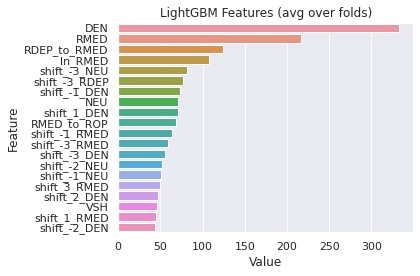

In [ ]:

plotImp(reg_sw_lgbm_8, X_train_8 , num = 20)

In [ ]:
#####layer 2

###pred VSH as variable and create shift (-5,5) VSH
X = X.drop(columns=['WELLNUM'])

SW_0 = reg_sw_lgbm_0.predict(X, num_iteration= reg_sw_lgbm_0.best_iteration_)
SW_1 = reg_sw_lgbm_1.predict(X, num_iteration= reg_sw_lgbm_1.best_iteration_)
SW_2 = reg_sw_lgbm_2.predict(X, num_iteration= reg_sw_lgbm_2.best_iteration_)
SW_3 = reg_sw_lgbm_3.predict(X, num_iteration= reg_sw_lgbm_3.best_iteration_)
SW_4 = reg_sw_lgbm_4.predict(X, num_iteration= reg_sw_lgbm_4.best_iteration_)
SW_5 = reg_sw_lgbm_5.predict(X, num_iteration= reg_sw_lgbm_5.best_iteration_)
SW_6 = reg_sw_lgbm_6.predict(X, num_iteration= reg_sw_lgbm_6.best_iteration_)
SW_7 = reg_sw_lgbm_7.predict(X, num_iteration= reg_sw_lgbm_7.best_iteration_)
SW_8 = reg_sw_lgbm_8.predict(X, num_iteration= reg_sw_lgbm_8.best_iteration_)
predicted_SW = (SW_0 + SW_1 + SW_2 + SW_3 + SW_4 + SW_5 + SW_6 + SW_7 + SW_8 )/9

df['sw_pred'] = predicted_SW

In [ ]:
df[['SW','sw_pred']][df['SW']!=1]

,SW,sw_pred
1099,0.327623,0.590307
1100,0.240611,0.395968
1101,0.781223,0.757165
1102,0.876567,0.844273
1103,0.689042,0.743230
...,...,...
34892,0.754000,0.824795
35107,0.993700,0.949976
35146,0.938100,0.981443
35148,0.816500,0.955189


In [ ]:
shift_level = [-3,-2,-1,1,2,3]
for j in shift_level:
  name = 'shift_'+str(j)+'_sw_pred'
  df[name] = df['sw_pred'].shift(j)

df['shift_-3_sw_pred'] = np.where(df['WELLNUM']!= df['shift_-3_WELLNUM'],df['sw_pred'], df['shift_-3_sw_pred'])
df['shift_-2_sw_pred'] = np.where(df['WELLNUM']!= df['shift_-2_WELLNUM'],df['sw_pred'], df['shift_-2_sw_pred'])
df['shift_-1_sw_pred'] = np.where(df['WELLNUM']!= df['shift_-1_WELLNUM'],df['sw_pred'], df['shift_-1_sw_pred'])
df['shift_1_sw_pred'] = np.where(df['WELLNUM']!= df['shift_1_WELLNUM'],df['sw_pred'], df['shift_1_sw_pred'])
df['shift_2_sw_pred'] = np.where(df['WELLNUM']!= df['shift_2_WELLNUM'],df['sw_pred'], df['shift_2_sw_pred'])
df['shift_3_sw_pred'] = np.where(df['WELLNUM']!= df['shift_3_WELLNUM'],df['sw_pred'], df['shift_3_sw_pred'])

df = df.fillna(0)

In [ ]:
core_feat = [ 'CALI', 'DEN', 'DENC','GR','NEU', 'RDEP', 'RMED', 'ROP'] 
null_feat = ['missing_DEN', 'missing_DENC','missing_GR','missing_NEU', 'missing_RDEP','missing_RMED','missing_CALI']

all_feat = core_feat + null_feat


log_feat = ['ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU', 'ln_RDEP', 'ln_RMED', 'ln_ROP']
out_lier_feat = ['is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU','is_outlier_RDEP', 'is_outlier_RMED', 'is_outlier_ROP']

range_feat = []
for i in [ 'CALI', 'DEN', 'DENC','GR','NEU', 'RDEP', 'RMED', 'ROP']:
  for j in [ '_mean','_min','_max','_std','_median']:
    range_feat.append(i+j)

shift_level = [-3,-2,-1,1,2,3]
shift_feat_list = []
for i in [ 'CALI', 'DEN', 'DENC','GR','NEU', 'RDEP', 'RMED', 'ROP']:
  for j in shift_level:
    name = 'shift_'+str(j)+'_'+i
    shift_feat_list.append(name)

df['RDEP_to_RMED'] = df['RDEP']/df['RMED']
df['RMED_to_ROP'] = df['RMED']/df['ROP']
df['ROP_to_RDEP'] = df['ROP']/df['RDEP']

all_feat = all_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + ['M', 'C','VSH'] + range_feat + shift_feat_list + ['RDEP_to_RMED']+['RMED_to_ROP']+['ROP_to_RDEP']+ ['shift_-3_sw_pred','shift_-2_sw_pred','shift_-1_sw_pred','shift_1_sw_pred']+ ['sw_pred'] + ['shift_2_sw_pred']+['shift_3_sw_pred']
all_feat = list(dict.fromkeys(all_feat))
X = df[all_feat]

In [ ]:
y = df[['SW']]

In [ ]:
####final PHIF model

X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X, y, test_size=0.15, random_state=4)

X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X, y, test_size=0.15, random_state=23)

sw_lgbm_9 = lgb.LGBMRegressor(
       objective='regression',num_boost_round= 300,
       metric = 'rmse')

sw_lgbm_10 = lgb.LGBMRegressor(
       objective='regression',num_boost_round= 300,
       metric = 'rmse')

####final model for reg

reg_sw_lgbm_9 = sw_lgbm_9.fit(X_train_9, y_train_9,eval_set=[(X_test_9, y_test_9)],eval_metric='rmse',callbacks=[lgb.early_stopping(20)])

reg_sw_lgbm_10 = sw_lgbm_10.fit(X_train_10, y_train_10,eval_set=[(X_test_10, y_test_10)],eval_metric='rmse',callbacks=[lgb.early_stopping(20)])

[1]	valid_0's rmse: 0.326574
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's rmse: 0.294123
[3]	valid_0's rmse: 0.264929
[4]	valid_0's rmse: 0.238664
[5]	valid_0's rmse: 0.215027
[6]	valid_0's rmse: 0.193787
[7]	valid_0's rmse: 0.174698
[8]	valid_0's rmse: 0.15754
[9]	valid_0's rmse: 0.142116
[10]	valid_0's rmse: 0.128256
[11]	valid_0's rmse: 0.115821
[12]	valid_0's rmse: 0.104682
[13]	valid_0's rmse: 0.0946883
[14]	valid_0's rmse: 0.0857337
[15]	valid_0's rmse: 0.0777239
[16]	valid_0's rmse: 0.0705594
[17]	valid_0's rmse: 0.0641662
[18]	valid_0's rmse: 0.0584524
[19]	valid_0's rmse: 0.053373
[20]	valid_0's rmse: 0.048865
[21]	valid_0's rmse: 0.0448978
[22]	valid_0's rmse: 0.0413807
[23]	valid_0's rmse: 0.038278
[24]	valid_0's rmse: 0.0355567
[25]	valid_0's rmse: 0.0331695
[26]	valid_0's rmse: 0.0310836
[27]	valid_0's rmse: 0.02927
[28]	valid_0's rmse: 0.0277208
[29]	valid_0's rmse: 0.0263625
[30]	valid_0's rmse: 0.0252211
[31]	valid_0's rmse: 0.024238
[32]	

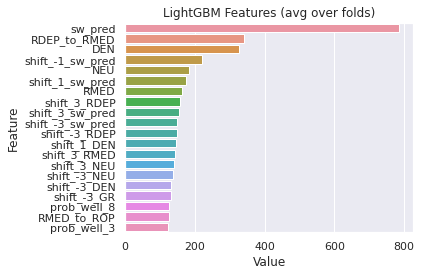

In [ ]:
plotImp(reg_sw_lgbm_9, X_train_9 , num = 20)

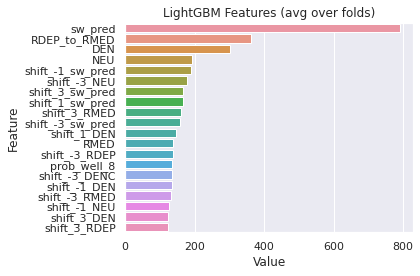

In [ ]:
plotImp(reg_sw_lgbm_10, X_train_10 , num = 20)

###Input test

In [ ]:
uploaded = files.upload()
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test.csv


In [ ]:
####create same feature both logical and predictive feature (well and line)

df_test['missing_DTC'] = np.where(df_test['DTC']== -9999, 1, 0)
df_test['missing_DTS'] = np.where(df_test['DTS']== -9999, 1, 0)
df_test['missing_BS'] = np.where(df_test['BS']== -9999, 1, 0)
df_test['missing_DEN'] = np.where(df_test['DEN']== -9999, 1, 0)
df_test['missing_DENC'] = np.where(df_test['DENC']== -9999, 1, 0)
df_test['missing_GR'] = np.where(df_test['GR']== -9999, 1, 0)
df_test['missing_NEU'] = np.where(df_test['NEU']== -9999, 1, 0)
df_test['missing_PEF'] = np.where(df_test['PEF']== -9999, 1, 0)
df_test['missing_RDEP'] = np.where(df_test['RDEP']== -9999, 1, 0)
df_test['missing_RMED'] = np.where(df_test['RMED']== -9999, 1, 0)
df_test['missing_CALI'] = np.where(df_test['CALI']== -9999, 1, 0)

df_test.replace(['-9999', -9999], 0, inplace=True)

In [ ]:
df_DTC_group = df_test.groupby('WELLNUM').agg({'DTC': ['mean', 'min', 'max','std','median']})
df_DTC_group.columns = df_DTC_group.columns.map('_'.join)
df_DTC_group = df_DTC_group.reset_index()

df_DTS_group = df_test.groupby('WELLNUM').agg({'DTS': ['mean', 'min', 'max','std','median']})
df_DTS_group.columns = df_DTS_group.columns.map('_'.join)
df_DTS_group = df_DTS_group.reset_index()

df_BS_group = df_test.groupby('WELLNUM').agg({'BS': ['mean', 'min', 'max','std','median']})
df_BS_group.columns = df_BS_group.columns.map('_'.join)
df_BS_group = df_BS_group.reset_index()

df_CALI_group = df_test.groupby('WELLNUM').agg({'CALI': ['mean', 'min', 'max','std','median']})
df_CALI_group.columns = df_CALI_group.columns.map('_'.join)
df_CALI_group = df_CALI_group.reset_index()

df_DEN_group = df_test.groupby('WELLNUM').agg({'DEN': ['mean', 'min', 'max','std','median']})
df_DEN_group.columns = df_DEN_group.columns.map('_'.join)
df_DEN_group = df_DEN_group.reset_index()

df_DENC_group = df_test.groupby('WELLNUM').agg({'DENC': ['mean', 'min', 'max','std','median']})
df_DENC_group.columns = df_DENC_group.columns.map('_'.join)
df_DENC_group = df_DENC_group.reset_index()

df_GR_group = df_test.groupby('WELLNUM').agg({'GR': ['mean', 'min', 'max','std','median']})
df_GR_group.columns = df_GR_group.columns.map('_'.join)
df_GR_group = df_GR_group.reset_index()

df_NEU_group = df_test.groupby('WELLNUM').agg({'NEU': ['mean', 'min', 'max','std','median']})
df_NEU_group.columns = df_NEU_group.columns.map('_'.join)
df_NEU_group = df_NEU_group.reset_index()

df_PEF_group = df_test.groupby('WELLNUM').agg({'PEF': ['mean', 'min', 'max','std','median']})
df_PEF_group.columns = df_PEF_group.columns.map('_'.join)
df_PEF_group = df_PEF_group.reset_index()

df_RDEP_group = df_test.groupby('WELLNUM').agg({'RDEP': ['mean', 'min', 'max','std','median']})
df_RDEP_group.columns = df_RDEP_group.columns.map('_'.join)
df_RDEP_group = df_RDEP_group.reset_index()

df_RMED_group = df_test.groupby('WELLNUM').agg({'RMED': ['mean', 'min', 'max','std','median']})
df_RMED_group.columns = df_RMED_group.columns.map('_'.join)
df_RMED_group = df_RMED_group.reset_index()

df_ROP_group = df_test.groupby('WELLNUM').agg({'ROP': ['mean', 'min', 'max','std','median']})
df_ROP_group.columns = df_ROP_group.columns.map('_'.join)
df_ROP_group = df_ROP_group.reset_index()

In [ ]:
### max min avg std of feature by well
df_test = df_test.merge(df_DTC_group, on='WELLNUM', how='left')
df_test = df_test.merge(df_DTS_group, on='WELLNUM', how='left')
df_test = df_test.merge(df_BS_group, on='WELLNUM', how='left')
df_test = df_test.merge(df_CALI_group, on='WELLNUM', how='left')
df_test = df_test.merge(df_DEN_group, on='WELLNUM', how='left')
df_test = df_test.merge(df_DENC_group, on='WELLNUM', how='left')
df_test = df_test.merge(df_GR_group, on='WELLNUM', how='left')
df_test = df_test.merge(df_NEU_group, on='WELLNUM', how='left')
df_test = df_test.merge(df_PEF_group, on='WELLNUM', how='left')
df_test = df_test.merge(df_RDEP_group, on='WELLNUM', how='left')
df_test = df_test.merge(df_RMED_group, on='WELLNUM', how='left')
df_test = df_test.merge(df_ROP_group, on='WELLNUM', how='left')

In [ ]:
####create same feature both logical and predictive feature (well and line)

df_test['missing_DTC'] = np.where(df_test['DTC']== -9999, 1, 0)
df_test['missing_DTS'] = np.where(df_test['DTS']== -9999, 1, 0)
df_test['missing_BS'] = np.where(df_test['BS']== -9999, 1, 0)
df_test['missing_DEN'] = np.where(df_test['DEN']== -9999, 1, 0)
df_test['missing_DENC'] = np.where(df_test['DENC']== -9999, 1, 0)
df_test['missing_GR'] = np.where(df_test['GR']== -9999, 1, 0)
df_test['missing_NEU'] = np.where(df_test['NEU']== -9999, 1, 0)
df_test['missing_PEF'] = np.where(df_test['PEF']== -9999, 1, 0)
df_test['missing_RDEP'] = np.where(df_test['RDEP']== -9999, 1, 0)
df_test['missing_RMED'] = np.where(df_test['RMED']== -9999, 1, 0)
df_test['missing_CALI'] = np.where(df_test['CALI']== -9999, 1, 0)

df_test.replace(['-9999', -9999], 0, inplace=True)

core_feat = ['DTC', 'DTS', 'BS', 'CALI', 'DEN', 'DENC','GR','NEU', 'PEF', 'RDEP', 'RMED', 'ROP'] 
null_feat = ['missing_DTC','missing_DTS', 'missing_BS', 'missing_DEN', 'missing_DENC','missing_GR','missing_NEU', 'missing_PEF', 'missing_RDEP','missing_RMED','missing_CALI']

df_test['DTC_to_DTS'] = df_test['DTC']/df_test['DTS']
df_test['DTS_to_BS'] = df_test['DTS']/df_test['BS']
df_test['BS_to_CALI'] = df_test['BS']/df_test['CALI']
df_test['CALI_to_DEN'] = df_test['CALI']/df_test['DEN']
df_test['DEN_to_DENC'] = df_test['DEN']/df_test['DENC']
df_test['DENC_to_GR'] = df_test['DENC']/df_test['GR']
df_test['GR_to_NEU'] = df_test['GR']/df_test['NEU']
df_test['NEU_to_PEF'] = df_test['NEU']/df_test['PEF']
df_test['PEF_to_RDEP'] = df_test['PEF']/df_test['RDEP']
df_test['RDEP_to_RMED'] = df_test['RDEP']/df_test['RMED']
df_test['RMED_to_ROP'] = df_test['RMED']/df_test['ROP']
df_test['ROP_to_DTC'] = df_test['ROP']/df_test['DTC']
df_test['DTC_to_BS'] = df_test['DTC']/df_test['BS']
df_test['DTS_to_CALI'] = df_test['DTS']/df_test['CALI']
df_test['BS_to_DEN'] = df_test['BS']/df_test['DEN']
df_test['CALI_to_DENC'] = df_test['CALI']/df_test['DENC']
df_test['DEN_to_GR'] = df_test['DEN']/df_test['GR']
df_test['DENC_to_NEU'] = df_test['DENC']/df_test['NEU']



###log

for i in core_feat:
  feat = 'ln_'+i
  df_test[feat] = np.log(df_test[i])


###outlier
df_test['is_outlier_DTC'] = np.where( df_test['DTC'] > 95 , 1, 0 )
df_test['is_outlier_DTS'] = np.where( df_test['DTS'] > 152 , 1, 0 )
df_test['is_outlier_BS'] = np.where( df_test['BS'] > 8.6 , 1, 0 )
df_test['is_outlier_CALI'] = np.where( df_test['CALI'] > 8.8 , 1, 0 )
df_test['is_outlier_DEN'] = np.where( df_test['DEN'] > 2.7 , 1, 0 )
df_test['is_outlier_DENC'] = np.where( df_test['DENC'] > 0.09 , 1, 0 )
df_test['is_outlier_GR'] = np.where( df_test['GR'] > 89 , 1, 0 )
df_test['is_outlier_GR_2'] = np.where( df_test['GR'] > 120 , 1, 0 )
df_test['is_outlier_GR_3'] = np.where( df_test['GR'] > 200 , 1, 0 )
df_test['is_outlier_NEU'] = np.where( df_test['NEU'] > 0.32 , 1, 0 )
df_test['is_outlier_PEF'] = np.where( df_test['PEF'] > 8.5 , 1, 0 )
df_test['is_outlier_RDEP'] = np.where( df_test['RDEP'] > 30 , 1, 0 )
df_test['is_outlier_RDEP'] = np.where( df_test['RDEP'] > 120 , 1, 0 )
df_test['is_outlier_RMED']= np.where( df_test['RMED'] > 530, 1, 0 )
df_test['is_outlier_ROP']= np.where( df_test['ROP'] > 37 , 1, 0 )


###feature power of 2

df_test['pow_DTC'] = np.power(2,(df_test['DTC']))
df_test['pow_DTS'] = np.power(2,df_test['DTS'])
df_test['pow_BS'] = np.power(2,3.7*df_test['BS'])
df_test['pow_CALI'] = np.power(2,3.7*df_test['CALI'])
df_test['pow_DEN'] = np.power(2,3.7*df_test['DEN'])
df_test['pow_DENC'] = np.power(2,3.7*df_test['DENC'])
df_test['pow_GR'] = np.power(2,3.7*df_test['GR'])
df_test['pow_NEU'] = np.power(2,3.7*df_test['NEU'])
df_test['pow_PEF'] = np.power(2,3.7*df_test['PEF'])
df_test['pow_RDEP'] = np.power(2,3.7*df_test['RDEP'])
df_test['pow_RMED'] = np.power(2,3.7*df_test['RMED'])
df_test['pow_ROP'] = np.power(2,3.7*df_test['ROP'])





In [ ]:
all_feat = core_feat + null_feat
ratio_feat = ['BS_to_CALI', 'CALI_to_DEN', 'DEN_to_DENC', 'DENC_to_GR', 'GR_to_NEU','NEU_to_PEF', 'PEF_to_RDEP', 'RDEP_to_RMED', 'RMED_to_ROP','ROP_to_DTC']
log_feat = ['ln_DTC', 'ln_DTS', 'ln_BS', 'ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU', 'ln_PEF', 'ln_RDEP', 'ln_RMED', 'ln_ROP']
out_lier_feat = ['is_outlier_DTC', 'is_outlier_DTS', 'is_outlier_BS', 'is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU', 'is_outlier_PEF','is_outlier_RDEP', 'is_outlier_RMED', 'is_outlier_ROP']

all_feat = all_feat + ratio_feat + log_feat + out_lier_feat
X = df_test[all_feat]

In [ ]:
###predictive feature line & well

well_proba = full_well_lgbm_classifi.predict_proba(X)

p_well_cols = []
for i in range(0,9):
  name = 'prob_well_'+str(i)
  p_well_cols.append(name)

df_well_proba = pd.DataFrame(well_proba, columns =p_well_cols)

line_proba = full_line_classifi.predict(X)
p_l_cols = []
for i in range(1,24):
  name = 'p_l_'+str(i)
  p_l_cols.append(name)

df_line_proba = pd.DataFrame(line_proba, columns =p_l_cols)

df_test = pd.concat([df_test.reset_index(), df_line_proba],  axis=1)
df_test = df_test.drop(columns=['index'])
df_test = pd.concat([df_test, df_well_proba],  axis=1)

df_test['line_num'] = df_test.apply(group_line, axis =1)

In [ ]:
### M&C

df_test['M'] = df_test['line_num'].apply(group_M)
df_test['C'] = df_test['line_num'].apply(group_C)

In [ ]:
####Shift 1, 2, -1, -2  of null use same_rows
shift_feat = ['WELLNUM'] + core_feat
shift_level = [-5,-4,-3,-2,-1,1,2,3,4,5]
for i in shift_feat:
  for j in shift_level:
    name = 'shift_'+str(j)+'_'+i
    df_test[name] = df_test[i].shift(j)

### fixed wrong well shift
for i in core_feat:
  shift_name_1 = 'shift_-3_'+i
  shift_name_2 = 'shift_-2_'+i
  shift_name_3 = 'shift_-1_'+i
  shift_name_4 = 'shift_1_'+i
  shift_name_5 = 'shift_2_'+i
  shift_name_6 = 'shift_3_'+i
  shift_name_7 = 'shift_-4_'+i
  shift_name_8 = 'shift_4_'+i
  shift_name_9 = 'shift_-5_'+i
  shift_name_10 = 'shift_5_'+i

  df_test[shift_name_1] = np.where(df_test['WELLNUM']!= df_test['shift_-3_WELLNUM'],df_test[i], df_test[shift_name_1])
  df_test[shift_name_2] = np.where(df_test['WELLNUM']!= df_test['shift_-2_WELLNUM'],df_test[i], df_test[shift_name_2])
  df_test[shift_name_3] = np.where(df_test['WELLNUM']!= df_test['shift_-1_WELLNUM'],df_test[i], df_test[shift_name_3])
  df_test[shift_name_4] = np.where(df_test['WELLNUM']!= df_test['shift_1_WELLNUM'],df_test[i], df_test[shift_name_4])
  df_test[shift_name_5] = np.where(df_test['WELLNUM']!= df_test['shift_2_WELLNUM'],df_test[i], df_test[shift_name_5])
  df_test[shift_name_6] = np.where(df_test['WELLNUM']!= df_test['shift_3_WELLNUM'],df_test[i], df_test[shift_name_6])
  df_test[shift_name_7] = np.where(df_test['WELLNUM']!= df_test['shift_-4_WELLNUM'],df_test[i], df_test[shift_name_7])
  df_test[shift_name_8] = np.where(df_test['WELLNUM']!= df_test['shift_4_WELLNUM'],df_test[i], df_test[shift_name_8])
  df_test[shift_name_9] = np.where(df_test['WELLNUM']!= df_test['shift_-5_WELLNUM'],df_test[i], df_test[shift_name_9])
  df_test[shift_name_10] = np.where(df_test['WELLNUM']!= df_test['shift_5_WELLNUM'],df_test[i], df_test[shift_name_10])

In [ ]:
# all_feat = core_feat + null_feat
# ratio_feat = ['BS_to_CALI', 'CALI_to_DEN', 'DEN_to_DENC', 'DENC_to_GR', 'GR_to_NEU','NEU_to_PEF', 'PEF_to_RDEP', 'RDEP_to_RMED', 'RMED_to_ROP','ROP_to_DTC','DTC_to_BS','DTS_to_CALI','BS_to_DEN','CALI_to_DENC','DEN_to_GR','DENC_to_NEU']
# log_feat = ['ln_DTC', 'ln_DTS', 'ln_BS', 'ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU', 'ln_PEF', 'ln_RDEP', 'ln_RMED', 'ln_ROP']
# out_lier_feat = ['is_outlier_DTC', 'is_outlier_DTS', 'is_outlier_BS', 'is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU', 'is_outlier_PEF','is_outlier_RDEP', 'is_outlier_RMED', 'is_outlier_ROP']

# all_feat = all_feat + ratio_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + ['M', 'C']+ ['WELLNUM']
# X = df_test[all_feat]

# df_test['vsh_pred'] = best_vsh_lgb.predict(X)

In [ ]:
# df_test['vsh_pred']

In [ ]:
df_test= df_test.fillna(0)

In [ ]:
all_feat = core_feat + null_feat
ratio_feat = [ 'CALI_to_DEN', 'DEN_to_DENC', 'DENC_to_GR', 'GR_to_NEU','NEU_to_PEF', 'PEF_to_RDEP', 'RDEP_to_RMED', 'RMED_to_ROP','ROP_to_DTC','DTC_to_BS','DTS_to_CALI','BS_to_DEN','CALI_to_DENC','DEN_to_GR','DENC_to_NEU']
log_feat = ['ln_DTC', 'ln_DTS', 'ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU', 'ln_PEF', 'ln_RDEP', 'ln_RMED', 'ln_ROP']
out_lier_feat = ['is_outlier_DTC', 'is_outlier_DTS', 'is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU', 'is_outlier_PEF','is_outlier_RDEP', 'is_outlier_RMED', 'is_outlier_ROP']

range_feat = []
for i in core_feat:
  for j in [ '_mean','_min','_max','_std','_median']:
    range_feat.append(i+j)
power_feat = ['pow_DTC','pow_DTS','pow_CALI','pow_DEN','pow_DENC','pow_GR','pow_NEU','pow_PEF','pow_RDEP','pow_RMED','pow_ROP']

shift_level = [-5,-4,-3,-2,-1,1,2,3,4,5]
shift_feat_list = []
for i in core_feat:
  for j in shift_level:
    name = 'shift_'+str(j)+'_'+i
    shift_feat_list.append(name)


all_feat = all_feat + ratio_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + range_feat + ['M', 'C','DEPTH'] + shift_feat_list + power_feat
X = df_test[all_feat]

In [ ]:
len(all_feat)

288

In [ ]:
df_test

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,VSH,missing_DTC,missing_DTS,missing_BS,missing_DEN,missing_DENC,missing_GR,missing_NEU,missing_PEF,missing_RDEP,missing_RMED,missing_CALI,DTC_mean,DTC_min,DTC_max,DTC_std,DTC_median,DTS_mean,DTS_min,DTS_max,DTS_std,DTS_median,BS_mean,BS_min,BS_max,BS_std,...,shift_-5_PEF,shift_-4_PEF,shift_-3_PEF,shift_-2_PEF,shift_-1_PEF,shift_1_PEF,shift_2_PEF,shift_3_PEF,shift_4_PEF,shift_5_PEF,shift_-5_RDEP,shift_-4_RDEP,shift_-3_RDEP,shift_-2_RDEP,shift_-1_RDEP,shift_1_RDEP,shift_2_RDEP,shift_3_RDEP,shift_4_RDEP,shift_5_RDEP,shift_-5_RMED,shift_-4_RMED,shift_-3_RMED,shift_-2_RMED,shift_-1_RMED,shift_1_RMED,shift_2_RMED,shift_3_RMED,shift_4_RMED,shift_5_RMED,shift_-5_ROP,shift_-4_ROP,shift_-3_ROP,shift_-2_ROP,shift_-1_ROP,shift_1_ROP,shift_2_ROP,shift_3_ROP,shift_4_ROP,shift_5_ROP
0,100,15912.5,65.46309,0.0,8.5,8.275658,2.545791,0.051429,9.791040,0.134139,5.858729,2.881351,2.645010,262.28170,0.057574,0,0,0,0,0,0,0,0,0,0,0,75.770003,0.0,116.9361,20.273725,73.28034,88.968407,0.0,183.4574,69.139135,127.3357,8.5,8.5,8.5,0.0,...,5.179704,5.179704,6.202412,6.060280,6.021325,5.858729,5.858729,5.858729,5.858729,5.858729,3.045108,3.054653,3.054653,3.027379,2.881351,2.881351,2.881351,2.881351,2.881351,2.881351,2.975753,2.974949,2.974949,2.928987,2.645010,2.645010,2.645010,2.645010,2.645010,2.645010,261.42740,261.52470,261.71960,261.98810,262.03700,262.28170,262.28170,262.28170,262.28170,262.28170
1,100,15913.0,64.56976,0.0,8.5,8.275658,2.524871,0.043547,11.278870,0.111488,6.021325,2.881351,2.645010,262.03700,0.078199,0,0,0,0,0,0,0,0,0,0,0,75.770003,0.0,116.9361,20.273725,73.28034,88.968407,0.0,183.4574,69.139135,127.3357,8.5,8.5,8.5,0.0,...,5.179704,5.179704,5.179704,6.202412,6.060280,5.858729,6.021325,6.021325,6.021325,6.021325,3.045360,3.045108,3.054653,3.054653,3.027379,2.881351,2.881351,2.881351,2.881351,2.881351,2.968783,2.975753,2.974949,2.974949,2.928987,2.645010,2.645010,2.645010,2.645010,2.645010,261.42740,261.42740,261.52470,261.71960,261.98810,262.28170,262.03700,262.03700,262.03700,262.03700
2,100,15913.5,64.43656,0.0,8.5,8.275658,2.507431,0.037683,9.954506,0.112142,6.060280,3.027379,2.928987,261.98810,0.065635,0,0,0,0,0,0,0,0,0,0,0,75.770003,0.0,116.9361,20.273725,73.28034,88.968407,0.0,183.4574,69.139135,127.3357,8.5,8.5,8.5,0.0,...,5.179704,5.179704,5.179704,5.179704,6.202412,6.021325,5.858729,6.060280,6.060280,6.060280,3.045360,3.045360,3.045108,3.054653,3.054653,2.881351,2.881351,3.027379,3.027379,3.027379,2.968783,2.968783,2.975753,2.974949,2.974949,2.645010,2.645010,2.928987,2.928987,2.928987,261.13570,261.42740,261.42740,261.52470,261.71960,262.03700,262.28170,261.98810,261.98810,261.98810
3,100,15914.0,65.03485,0.0,8.5,8.275658,2.575224,0.064832,8.630137,0.114846,6.202412,3.054653,2.974949,261.71960,0.047975,0,0,0,0,0,0,0,0,0,0,0,75.770003,0.0,116.9361,20.273725,73.28034,88.968407,0.0,183.4574,69.139135,127.3357,8.5,8.5,8.5,0.0,...,5.179704,5.179704,5.179704,5.179704,5.179704,6.060280,6.021325,5.858729,6.202412,6.202412,3.047688,3.045360,3.045360,3.045108,3.054653,3.027379,2.881351,2.881351,3.054653,3.054653,2.979694,2.968783,2.968783,2.975753,2.974949,2.928987,2.645010,2.645010,2.974949,2.974949,261.18430,261.13570,261.42740,261.42740,261.52470,261.98810,262.03700,262.28170,261.71960,261.71960
4,100,15914.5,65.13235,0.0,8.5,8.286819,2.550074,0.017329,7.305769,0.116967,5.179704,3.054653,2.974949,261.52470,0.041857,0,0,0,0,0,0,0,0,0,0,0,75.770003,0.0,116.9361,20.273725,73.28034,88.968407,0.0,183.4574,69.139135,127.3357,8.5,8.5,8.5,0.0,...,5.188026,5.179704,5.179704,5.179704,5.179704,6.202412,6.060280,6.021325,5.858729,5.179704,3.061228,3.047688,3.045360,3.045360,3.045108,3.054653,3.027379,2.881351,2.881351,3.054653,2.970245,2.979694,2.968783,2.968783,2.975753,2.974949,2.928987,2.645010,2.645010,2.974949,261.08720,261.18430,261.13570,261.42740,261.42740,261.71960,261.98810,262.03700,262.28170,261.52470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
predicted_VSH_0 = reg_vsh_lgbm_0.predict(X, num_iteration= reg_vsh_lgbm_0.best_iteration_)
predicted_VSH_1 = reg_vsh_lgbm_1.predict(X, num_iteration= reg_vsh_lgbm_1.best_iteration_)
predicted_VSH_2 = reg_vsh_lgbm_2.predict(X, num_iteration= reg_vsh_lgbm_2.best_iteration_)
predicted_VSH_3 = reg_vsh_lgbm_3.predict(X, num_iteration= reg_vsh_lgbm_3.best_iteration_)
predicted_VSH_4 = reg_vsh_lgbm_4.predict(X, num_iteration= reg_vsh_lgbm_4.best_iteration_)

predicted_VSH = (predicted_VSH_0 +predicted_VSH_1 +predicted_VSH_2 +predicted_VSH_3 + predicted_VSH_4)/5

In [ ]:
df_test['vsh_pred'] = predicted_VSH

In [ ]:
#### shift vsh pred

shift_level = [-3,-2,-1,1,2,3]
for j in shift_level:
  name = 'shift_'+str(j)+'_vsh_pred'
  df_test[name] = df_test['vsh_pred'].shift(j)

df_test['shift_-3_vsh_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_-3_WELLNUM'],df_test['vsh_pred'], df_test['shift_-3_vsh_pred'])
df_test['shift_-2_vsh_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_-2_WELLNUM'],df_test['vsh_pred'], df_test['shift_-2_vsh_pred'])
df_test['shift_-1_vsh_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_-1_WELLNUM'],df_test['vsh_pred'], df_test['shift_-1_vsh_pred'])
df_test['shift_1_vsh_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_1_WELLNUM'],df_test['vsh_pred'], df_test['shift_1_vsh_pred'])
df_test['shift_2_vsh_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_2_WELLNUM'],df_test['vsh_pred'], df_test['shift_2_vsh_pred'])
df_test['shift_3_vsh_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_3_WELLNUM'],df_test['vsh_pred'], df_test['shift_3_vsh_pred'])

all_feat = core_feat + null_feat
ratio_feat = [ 'CALI_to_DEN', 'DEN_to_DENC', 'DENC_to_GR', 'GR_to_NEU','NEU_to_PEF', 'PEF_to_RDEP', 'RDEP_to_RMED', 'RMED_to_ROP','ROP_to_DTC','DTC_to_BS','DTS_to_CALI','BS_to_DEN','CALI_to_DENC','DEN_to_GR','DENC_to_NEU']
log_feat = ['ln_DTC', 'ln_DTS', 'ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU', 'ln_PEF', 'ln_RDEP', 'ln_RMED', 'ln_ROP']
out_lier_feat = ['is_outlier_DTC', 'is_outlier_DTS', 'is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU', 'is_outlier_PEF','is_outlier_RDEP', 'is_outlier_RMED', 'is_outlier_ROP']

range_feat = []
for i in core_feat:
  for j in [ '_mean','_min','_max','_std','_median']:
    range_feat.append(i+j)
power_feat = ['pow_DTC','pow_DTS','pow_CALI','pow_DEN','pow_DENC','pow_GR','pow_NEU','pow_PEF','pow_RDEP','pow_RMED','pow_ROP']

shift_level = [-5,-4,-3,-2,-1,1,2,3,4,5]
shift_feat_list = []
for i in core_feat:
  for j in shift_level:
    name = 'shift_'+str(j)+'_'+i
    shift_feat_list.append(name)

all_feat = all_feat + ratio_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + range_feat + ['M', 'C','DEPTH'] + shift_feat_list + power_feat + ['shift_-3_vsh_pred','shift_-2_vsh_pred','shift_-1_vsh_pred','shift_1_vsh_pred','shift_2_vsh_pred','shift_3_vsh_pred']+['vsh_pred']
X = df_test[all_feat]

In [ ]:
len(all_feat)

295

In [ ]:
df_test['VSH_5'] = reg_vsh_lgbm_5.predict(X, num_iteration= reg_vsh_lgbm_5.best_iteration_)
df_test['VSH_6'] = reg_vsh_lgbm_6.predict(X, num_iteration= reg_vsh_lgbm_6.best_iteration_)

In [ ]:
df_test[['VSH','VSH_5','VSH_6','vsh_pred']]

,VSH,VSH_5,VSH_6,vsh_pred
0,0.057574,0.045061,0.045358,0.044134
1,0.078199,0.058393,0.057963,0.058395
2,0.065635,0.048511,0.048295,0.047118
3,0.047975,0.031203,0.032225,0.032513
4,0.041857,0.023646,0.024291,0.023447
...,...,...,...,...
11270,0.249713,0.264983,0.266384,0.265372
11271,0.256223,0.264693,0.264775,0.264883
11272,0.233638,0.247996,0.247963,0.246938
11273,0.218768,0.237912,0.239239,0.238199


In [ ]:
df_test['VSH_final'] = (df_test['VSH_5']+df_test['VSH_6'])/2

In [ ]:
###PHIF

df_test['correct_denc'] = df_test['DEN']+df_test['DENC']
df_test['cden_poro'] = (2.65-df_test['correct_denc'])/(2.65-1)
df_test['avg_poro'] = (df_test['cden_poro']+df_test['NEU'])/2

In [ ]:
df = df.fillna(0)

core_feat = ['CALI', 'DEN', 'DENC','GR','NEU'] 
null_feat = ['missing_DEN', 'missing_DENC','missing_GR','missing_NEU','missing_CALI']

all_feat = core_feat + null_feat

###petro physics feat


log_feat = ['ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU']
out_lier_feat = ['is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU']

range_feat = []
for i in core_feat:
  for j in [ '_mean','_min','_max','_std','_median']:
    range_feat.append(i+j)

shift_level = [-3,-2,-1,1,2,3]
shift_feat_list = []
for i in core_feat:
  for j in shift_level:
    name = 'shift_'+str(j)+'_'+i
    shift_feat_list.append(name)

all_feat = all_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + ['M', 'C'] + ['VSH'] + range_feat + shift_feat_list +['correct_denc','cden_poro','avg_poro']
X = df_test[all_feat]

In [ ]:
predicted_PHIF_0 = reg_phif_lgbm_0.predict(X, num_iteration= reg_phif_lgbm_0.best_iteration_)
predicted_PHIF_1 = reg_phif_lgbm_1.predict(X, num_iteration= reg_phif_lgbm_1.best_iteration_)
predicted_PHIF_2 = reg_phif_lgbm_2.predict(X, num_iteration= reg_phif_lgbm_2.best_iteration_)
predicted_PHIF_3 = reg_phif_lgbm_3.predict(X, num_iteration= reg_phif_lgbm_3.best_iteration_)
predicted_PHIF_4 = reg_phif_lgbm_4.predict(X, num_iteration= reg_phif_lgbm_4.best_iteration_)
predicted_PHIF_5 = reg_phif_lgbm_5.predict(X, num_iteration= reg_phif_lgbm_5.best_iteration_)
predicted_PHIF_6 = reg_phif_lgbm_6.predict(X, num_iteration= reg_phif_lgbm_6.best_iteration_)
predicted_PHIF_7 = reg_phif_lgbm_7.predict(X, num_iteration= reg_phif_lgbm_7.best_iteration_)
predicted_PHIF_8 = reg_phif_lgbm_8.predict(X, num_iteration= reg_phif_lgbm_8.best_iteration_)
predicted_PHIF = (predicted_PHIF_0 + predicted_PHIF_1 + predicted_PHIF_2 + predicted_PHIF_3 + predicted_PHIF_4 + predicted_PHIF_5 + predicted_PHIF_6 + predicted_PHIF_7 + predicted_PHIF_8)/9

In [ ]:
df_test['phif_pred'] = predicted_PHIF

In [ ]:
#### shift phif pred
shift_level = [-3,-2,-1,1,2,3]
for j in shift_level:
  name = 'shift_'+str(j)+'_phif_pred'
  df_test[name] = df_test['phif_pred'].shift(j)

df_test['shift_-3_phif_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_-3_WELLNUM'],df_test['phif_pred'], df_test['shift_-3_phif_pred'])
df_test['shift_-2_phif_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_-2_WELLNUM'],df_test['phif_pred'], df_test['shift_-2_phif_pred'])
df_test['shift_-1_phif_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_-1_WELLNUM'],df_test['phif_pred'], df_test['shift_-1_phif_pred'])
df_test['shift_1_phif_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_1_WELLNUM'],df_test['phif_pred'], df_test['shift_1_phif_pred'])
df_test['shift_2_phif_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_2_WELLNUM'],df_test['phif_pred'], df_test['shift_2_phif_pred'])
df_test['shift_3_phif_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_3_WELLNUM'],df_test['phif_pred'], df_test['shift_3_phif_pred'])

df_test = df_test.fillna(0)

core_feat = ['CALI', 'DEN', 'DENC','GR','NEU'] 
null_feat = ['missing_DEN', 'missing_DENC','missing_GR','missing_NEU','missing_CALI']

all_feat = core_feat + null_feat

log_feat = ['ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU']
out_lier_feat = ['is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU']

range_feat = []
for i in core_feat:
  for j in [ '_mean','_min','_max','_std','_median']:
    range_feat.append(i+j)

shift_level = [-3,-2,-1,1,2,3]
shift_feat_list = []
for i in core_feat:
  for j in shift_level:
    name = 'shift_'+str(j)+'_'+i
    shift_feat_list.append(name)

all_feat = all_feat + ratio_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + range_feat + ['M', 'C'] + ['VSH'] + range_feat + shift_feat_list + ['correct_denc','cden_poro','avg_poro'] + ['shift_-3_phif_pred','shift_-2_phif_pred','shift_-1_phif_pred','shift_1_phif_pred']+ ['phif_pred'] + ['shift_2_phif_pred']+['shift_3_phif_pred']
all_feat = list(dict.fromkeys(all_feat))
X = df_test[all_feat]

In [ ]:
predicted_PHIF_9 = reg_phif_lgbm_9.predict(X, num_iteration= reg_phif_lgbm_9.best_iteration_)
predicted_PHIF_10 = reg_phif_lgbm_10.predict(X, num_iteration= reg_phif_lgbm_10.best_iteration_)

In [ ]:
df_test['PHIF'] = (predicted_PHIF_9 + predicted_PHIF_10)/2

In [ ]:
df_test['PHIF']

0        0.070782
1        0.082787
2        0.091708
3        0.054432
4        0.066580
           ...   
11270    0.140578
11271    0.140388
11272    0.140400
11273    0.148598
11274    0.157995
Name: PHIF, Length: 11275, dtype: float64

In [ ]:
core_feat = [ 'CALI', 'DEN', 'DENC','GR','NEU', 'RDEP', 'RMED', 'ROP'] 
null_feat = ['missing_DEN', 'missing_DENC','missing_GR','missing_NEU', 'missing_RDEP','missing_RMED','missing_CALI']

all_feat = core_feat + null_feat


log_feat = ['ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU', 'ln_RDEP', 'ln_RMED', 'ln_ROP']
out_lier_feat = ['is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU','is_outlier_RDEP', 'is_outlier_RMED', 'is_outlier_ROP']

range_feat = []
for i in [ 'CALI', 'DEN', 'DENC','GR','NEU', 'RDEP', 'RMED', 'ROP']:
  for j in [ '_mean','_min','_max','_std','_median']:
    range_feat.append(i+j)

shift_level = [-3,-2,-1,1,2,3]
shift_feat_list = []
for i in [ 'CALI', 'DEN', 'DENC','GR','NEU', 'RDEP', 'RMED', 'ROP']:
  for j in shift_level:
    name = 'shift_'+str(j)+'_'+i
    shift_feat_list.append(name)

df_test['RDEP_to_RMED'] = df_test['RDEP']/df_test['RMED']
df_test['RMED_to_ROP'] = df_test['RMED']/df_test['ROP']
df_test['ROP_to_RDEP'] = df_test['ROP']/df_test['RDEP']

all_feat = all_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + ['M', 'C','VSH'] + range_feat + shift_feat_list + ['RDEP_to_RMED']+['RMED_to_ROP']+['ROP_to_RDEP']
X = df_test[all_feat]

In [ ]:
predicted_SW_0 = reg_sw_lgbm_0.predict(X, num_iteration= reg_sw_lgbm_0.best_iteration_)
predicted_SW_1 = reg_sw_lgbm_1.predict(X, num_iteration= reg_sw_lgbm_1.best_iteration_)
predicted_SW_2 = reg_sw_lgbm_2.predict(X, num_iteration= reg_sw_lgbm_2.best_iteration_)
predicted_SW_3 = reg_sw_lgbm_3.predict(X, num_iteration= reg_sw_lgbm_3.best_iteration_)
predicted_SW_4 = reg_sw_lgbm_4.predict(X, num_iteration= reg_sw_lgbm_4.best_iteration_)
predicted_SW_5 = reg_sw_lgbm_5.predict(X, num_iteration= reg_sw_lgbm_5.best_iteration_)
predicted_SW_6 = reg_sw_lgbm_6.predict(X, num_iteration= reg_sw_lgbm_6.best_iteration_)
predicted_SW_7 = reg_sw_lgbm_7.predict(X, num_iteration= reg_sw_lgbm_7.best_iteration_)
predicted_SW_8 = reg_sw_lgbm_8.predict(X, num_iteration= reg_sw_lgbm_8.best_iteration_)
predicted_SW = (predicted_SW_0 + predicted_SW_1 + predicted_SW_2 + predicted_SW_3 + predicted_SW_4 + predicted_SW_5 + predicted_SW_6 + predicted_SW_7 + predicted_SW_8 )/9

df_test['sw_pred'] = predicted_SW

In [ ]:
####shift sw_pred
shift_level = [-3,-2,-1,1,2,3]
for j in shift_level:
  name = 'shift_'+str(j)+'_sw_pred'
  df_test[name] = df_test['sw_pred'].shift(j)

df_test['shift_-3_sw_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_-3_WELLNUM'],df_test['sw_pred'], df_test['shift_-3_sw_pred'])
df_test['shift_-2_sw_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_-2_WELLNUM'],df_test['sw_pred'], df_test['shift_-2_sw_pred'])
df_test['shift_-1_sw_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_-1_WELLNUM'],df_test['sw_pred'], df_test['shift_-1_sw_pred'])
df_test['shift_1_sw_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_1_WELLNUM'],df_test['sw_pred'], df_test['shift_1_sw_pred'])
df_test['shift_2_sw_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_2_WELLNUM'],df_test['sw_pred'], df_test['shift_2_sw_pred'])
df_test['shift_3_sw_pred'] = np.where(df_test['WELLNUM']!= df_test['shift_3_WELLNUM'],df_test['sw_pred'], df_test['shift_3_sw_pred'])

df_test = df_test.fillna(0)

core_feat = [ 'CALI', 'DEN', 'DENC','GR','NEU', 'RDEP', 'RMED', 'ROP'] 
null_feat = ['missing_DEN', 'missing_DENC','missing_GR','missing_NEU', 'missing_RDEP','missing_RMED','missing_CALI']

all_feat = core_feat + null_feat


log_feat = ['ln_CALI', 'ln_DEN','ln_DENC', 'ln_GR', 'ln_NEU', 'ln_RDEP', 'ln_RMED', 'ln_ROP']
out_lier_feat = ['is_outlier_CALI','is_outlier_DEN', 'is_outlier_DENC', 'is_outlier_GR', 'is_outlier_GR_2','is_outlier_GR_3', 'is_outlier_NEU','is_outlier_RDEP', 'is_outlier_RMED', 'is_outlier_ROP']

range_feat = []
for i in [ 'CALI', 'DEN', 'DENC','GR','NEU', 'RDEP', 'RMED', 'ROP']:
  for j in [ '_mean','_min','_max','_std','_median']:
    range_feat.append(i+j)

shift_level = [-3,-2,-1,1,2,3]
shift_feat_list = []
for i in [ 'CALI', 'DEN', 'DENC','GR','NEU', 'RDEP', 'RMED', 'ROP']:
  for j in shift_level:
    name = 'shift_'+str(j)+'_'+i
    shift_feat_list.append(name)
all_feat = list(dict.fromkeys(all_feat))
all_feat = all_feat + log_feat + out_lier_feat + p_well_cols + p_l_cols + ['M', 'C','VSH'] + range_feat + shift_feat_list + ['RDEP_to_RMED']+['RMED_to_ROP']+['ROP_to_RDEP']+ ['shift_-3_sw_pred','shift_-2_sw_pred','shift_-1_sw_pred','shift_1_sw_pred']+ ['sw_pred'] + ['shift_2_sw_pred']+['shift_3_sw_pred']

In [ ]:
X = df_test[all_feat]

In [ ]:
predicted_SW_9 = reg_sw_lgbm_9.predict(X, num_iteration= reg_sw_lgbm_9.best_iteration_)
predicted_SW_10 = reg_sw_lgbm_10.predict(X, num_iteration= reg_sw_lgbm_10.best_iteration_)

In [ ]:
df_test['SW'] = (predicted_SW_9+predicted_SW_10)/2

In [ ]:
name = ['SW','VSH_final','PHIF','VSH','sw_pred','phif_pred','vsh_pred']
for i in name:
  df_test[i] = np.where(df_test[i] < 0, 0, df_test[i])
  df_test[i] = np.where(df_test[i] > 1, 1, df_test[i])

In [ ]:
submission = df_test[['PHIF','SW','VSH']]

In [ ]:
submission.to_csv('submission.csv', index=False)
files.download('submission_2601_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
###เอา reg_vsgh_lgb ของ best sol แรกมาเป็น input 

###ใช้ depth ใน vsh ละเอา pred VSH มา stack เป็น feature อีกที

###sol1 ใช้ VSH ใน eval ขนาด 0.055 ดีกว่า ใส่ซัก 350 iter ensemble กัน 3 model แล้วเอามาบวกเฉลี่ยอันเดิม 0.7, PHIF ยังคงใช้ VSHใน input แต่ increase numboost เป็น 300 ใช้ random state 4, SW ใช้แค่ VSH

###sol2 เหมือน sol1 แต่ phif แบบเดิม cv by well numboost เยอะๆเลย ลองไม่ใช้ VSH ใน train ของ PHIF & SW

###sol3 เอา best VSH เข้ามาเป็นตัวตั้งต้นใน test ด้วย ใช้เป็น input PHIF & SW same

###เติม ratio ของ rm , rd, rop ให้ครบ

###IF BS > 8.5 ---> 0 ให้หมด

### +shift ได้อีกเป็นร้อย ปรับ early stoping และ boosting ก็ได้